<a href="https://colab.research.google.com/github/ErumUmer/CIND820_Capstone_Project/blob/main/Iram_ames_house_price_part3_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Ames House Price - Advanced Regression & Classification Techniques

**Import libraries**

In [3]:
# Import necessary libraries
import numpy as np  # NumPy is a library for numerical operations
import pandas as pd  # Pandas is a library for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib is used for creating plots and visualizations
import seaborn as sns  # Seaborn is a data visualization library built on top of Matplotlib

# Suppress FutureWarning messages to prevent them from cluttering the output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Enable inline plotting, which allows you to see plots directly in Jupyter Notebook or similar environments
%matplotlib inline

# Set the style of Seaborn plots to 'darkgrid', which provides a dark background with grid lines
sns.set_style('darkgrid')


Load **Data**

Load training and test data from CSV files, separate the features from the target variable in the training data, and then combine the features from both datasets into a single DataFrame for further data processing and analysis.The pd.concat function is used to concatenate (combine) the X_train DataFrame and the test_data DataFrame along axis 0, which means they are stacked vertically.
This results in a single DataFrame X that contains the features for both the training and test datasets. This is often done when you want to preprocess and clean the data in a consistent manner and perform operations on the entire dataset, including both training and test data.

In [4]:
# Load data
train_data = pd.read_csv('/content/train.csv', index_col='Id')
test_data = pd.read_csv('/content/test.csv', index_col='Id')

# Seperate features and target variable
X_train = train_data.drop(['SalePrice'], axis=1) #a new DataFrame X_train is created by removing the 'SalePrice' column from the train_data DataFrame.
y = train_data.SalePrice  #This line creates a Series (y) by selecting the 'SalePrice' column from the train_data DataFrame.

# Concatenate train and test data
X = pd.concat([X_train, test_data], axis=0)

**Describe data**

This code is printing the dimensions (number of rows and columns) of the "Train data" and "Test data" DataFrames, which are used in machine learning tasks.dataset is divided into a training set and a test set, each containing 79 features. The training set is used to train the model, while the test set is used to evaluate its performance on unseen data.

In [5]:
print("Train data's size: ", X_train.shape)
print("Test data's size: ", test_data.shape)

Train data's size:  (1460, 79)
Test data's size:  (1459, 79)


This code identifies and prints the names of numerical (non-categorical) features in the X_train DataFrame. It first selects columns that have a data type excluding 'object,' which typically represents non-numeric data. Then, it lists the names of these numerical columns and displays the count of such features. There are 36 numerical features

In [6]:
numCols = list(X_train.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 36 numerical features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


This code identifies and prints the names of categorical features in the X_train DataFrame. It selects columns that have a data type of 'object,' which typically represents categorical data. Then, it lists the names of these categorical columns and displays the count of such features. There are 43 catagorical features

In [7]:
catCols = list(X_train.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} catagorical features:\n", catCols)

There are 43 catagorical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Creating scatter plots to visually inspect the relationships between numerical features and 'SalePrice.' Scatter plots can help you identify trends, patterns, outliers, and potential correlations between features and the target variable. 'seaborn' and 'matplotlib.pyplot libraries are used for data visualization and plotting.

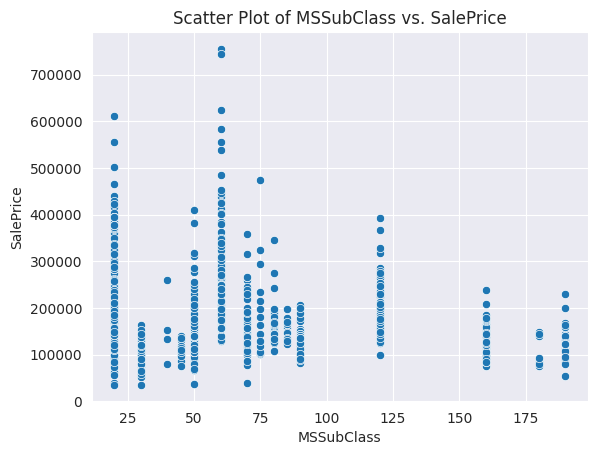

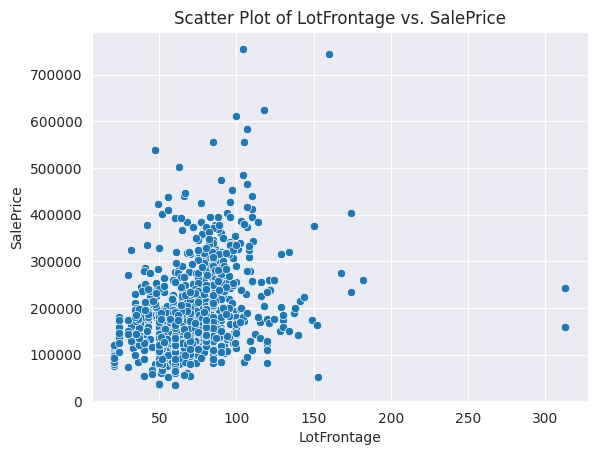

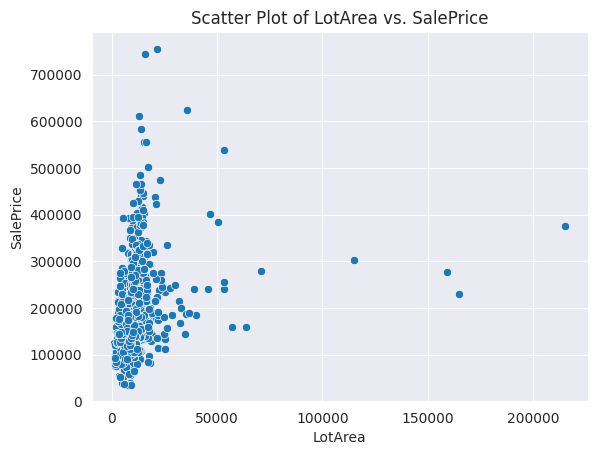

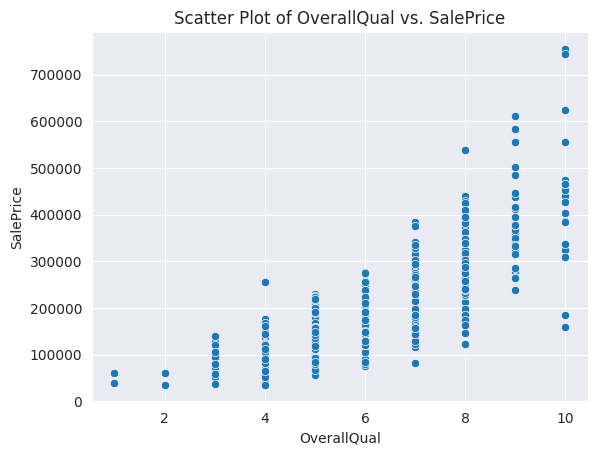

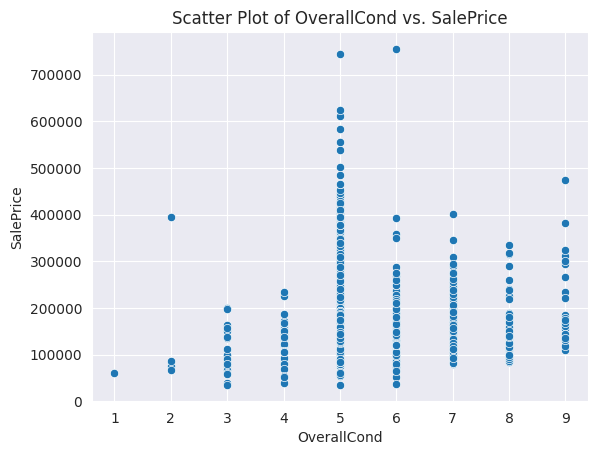

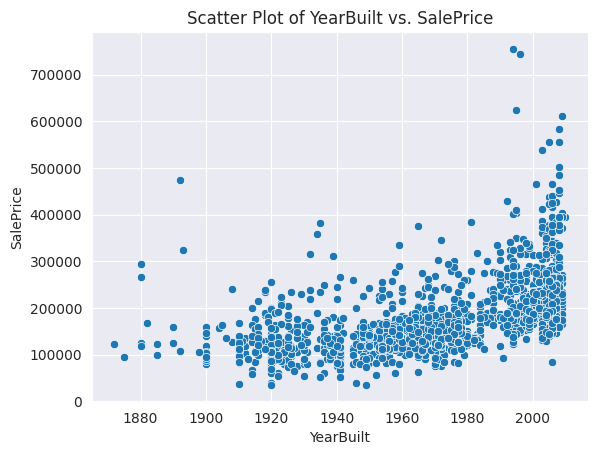

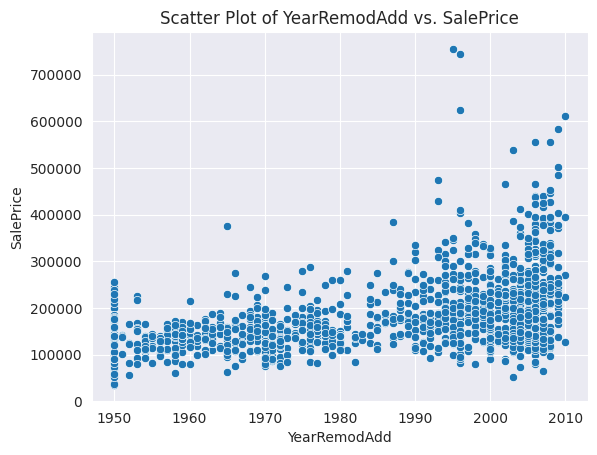

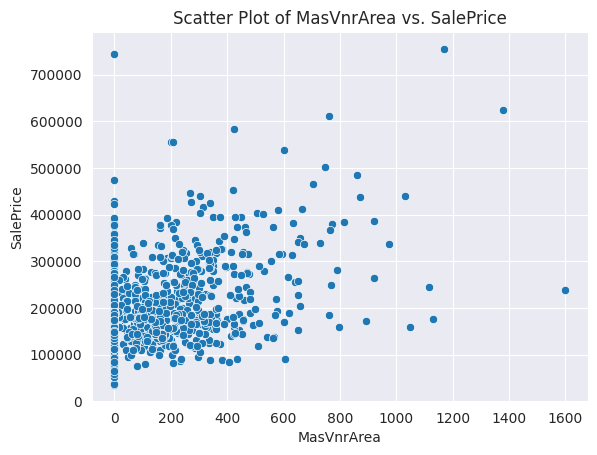

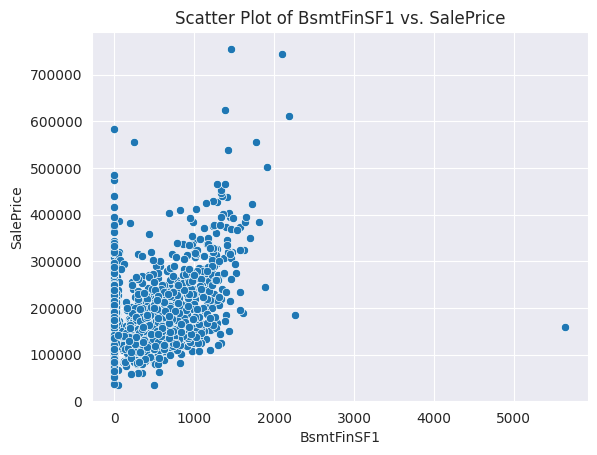

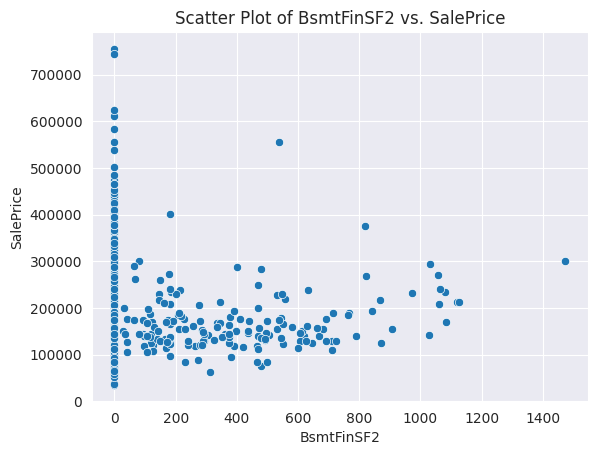

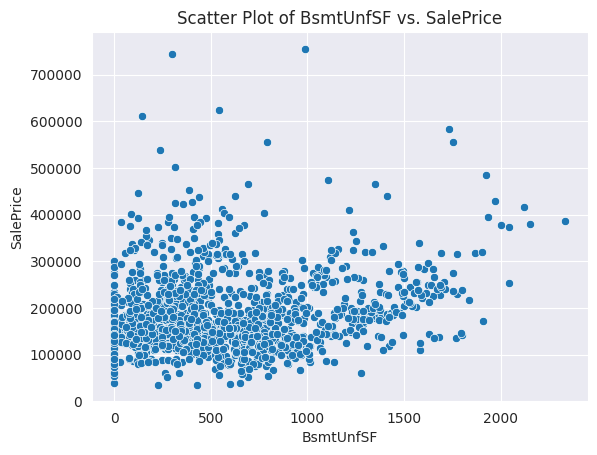

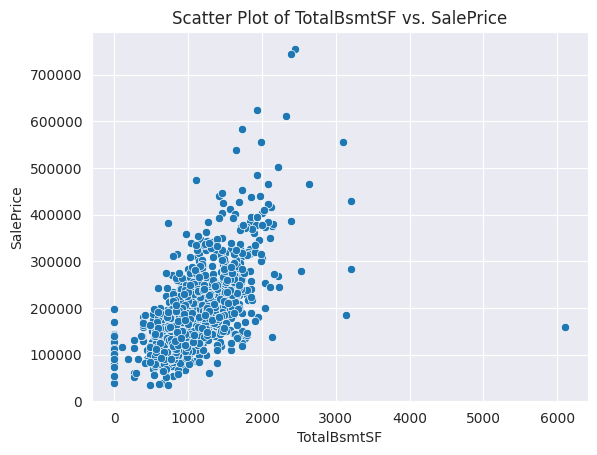

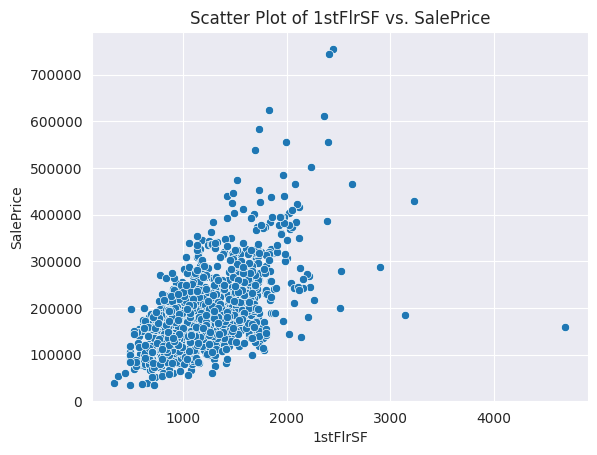

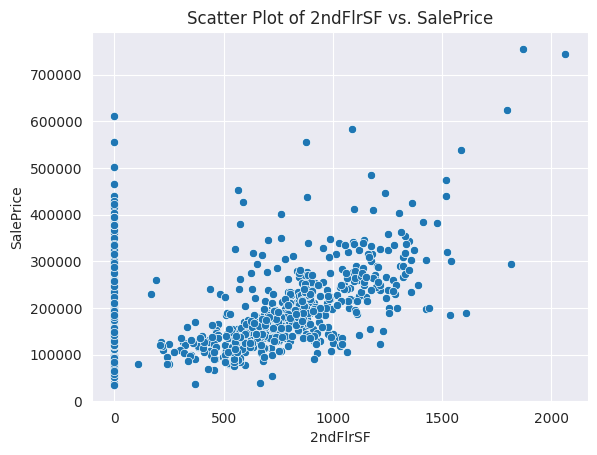

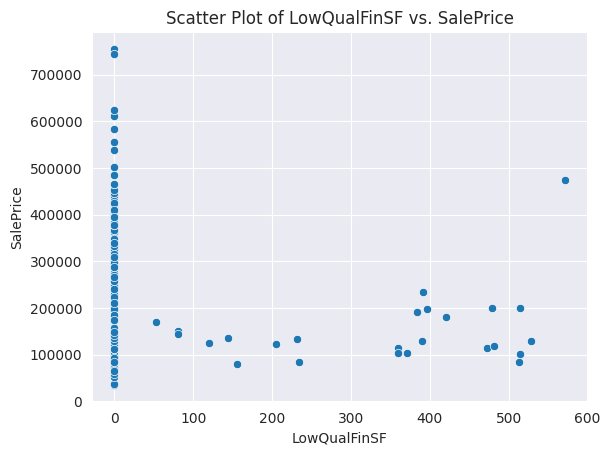

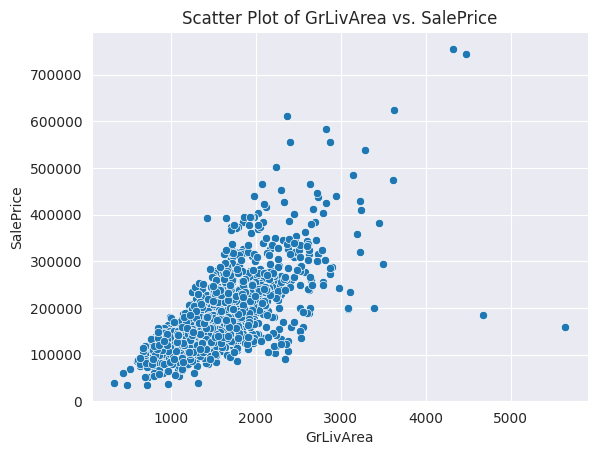

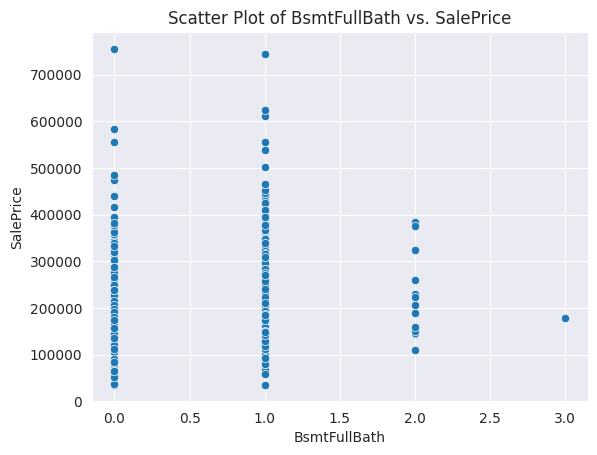

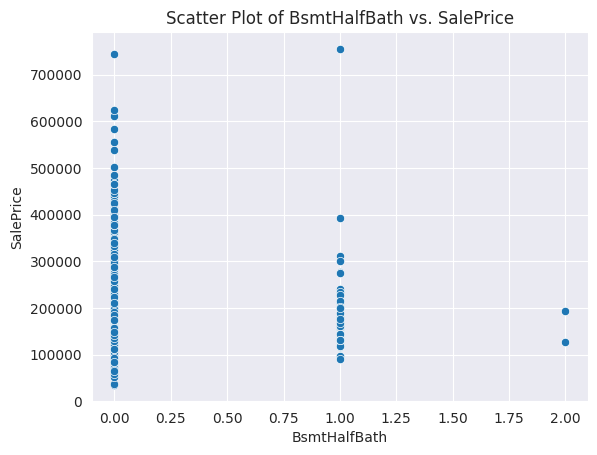

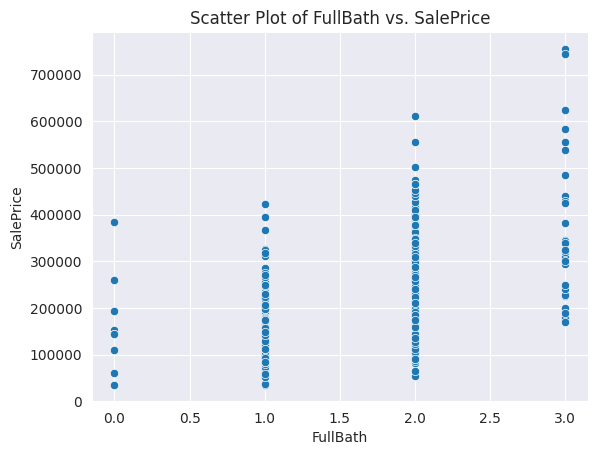

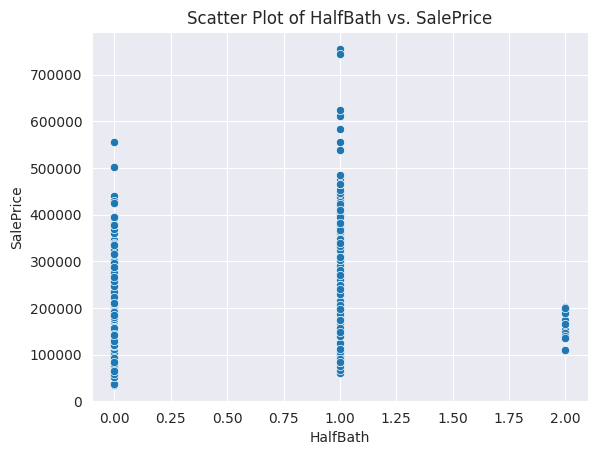

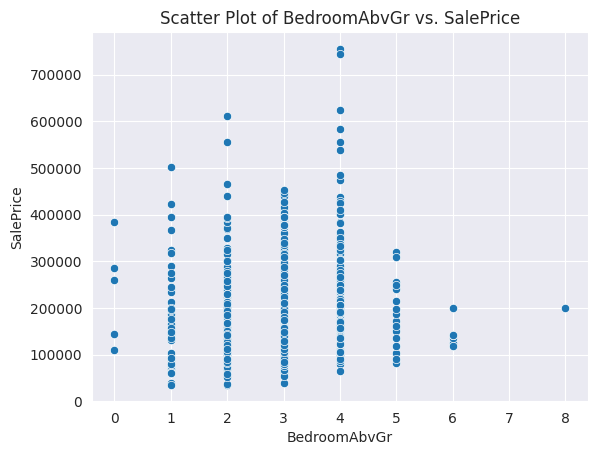

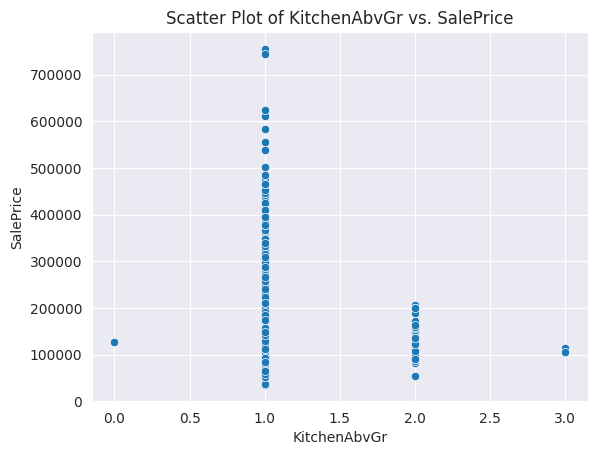

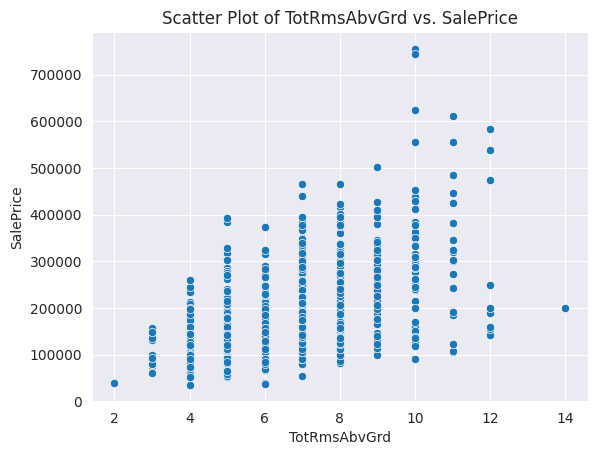

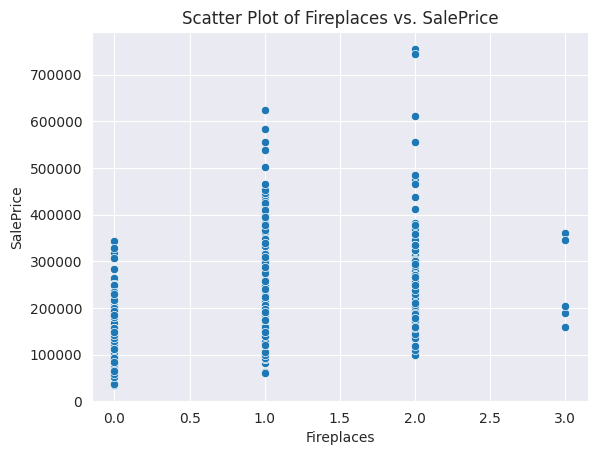

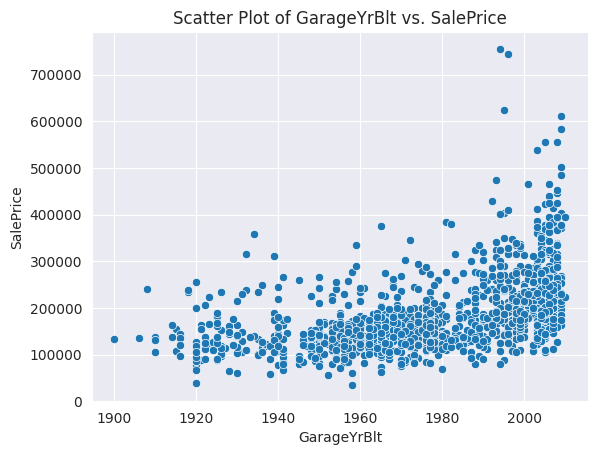

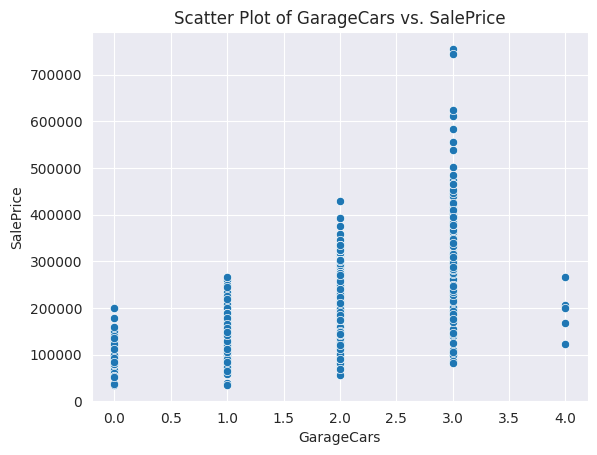

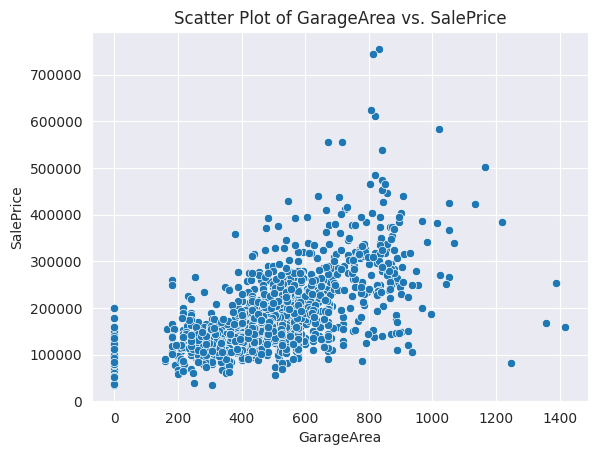

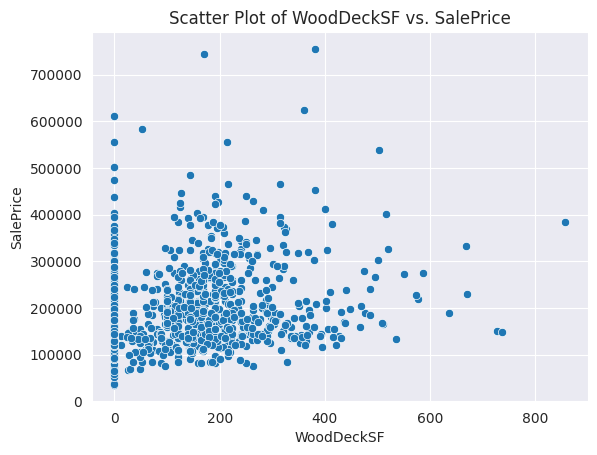

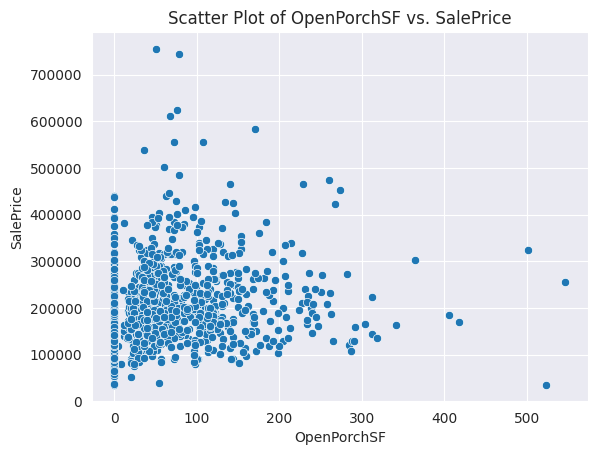

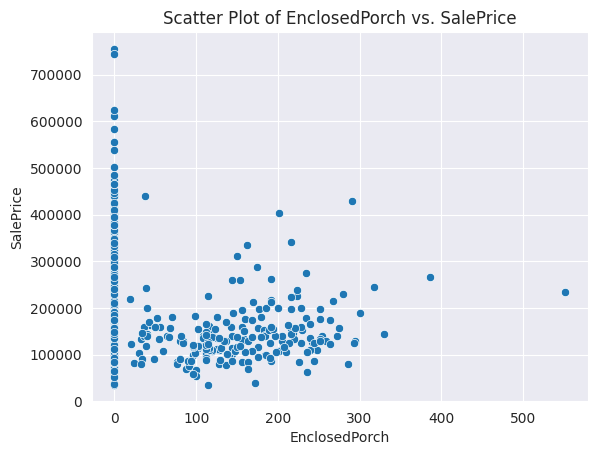

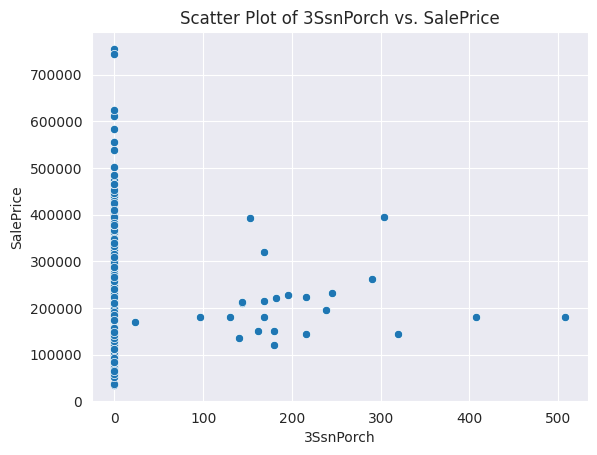

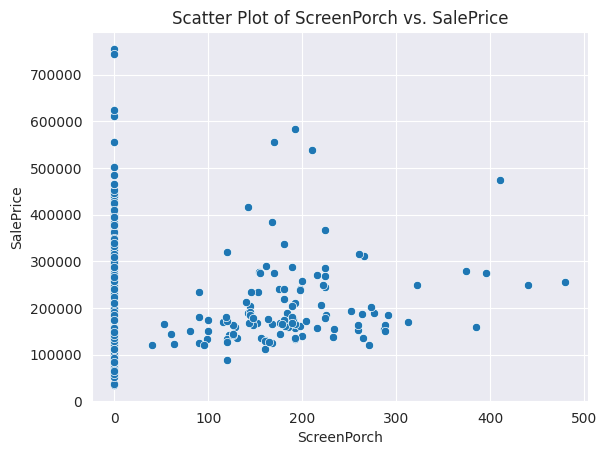

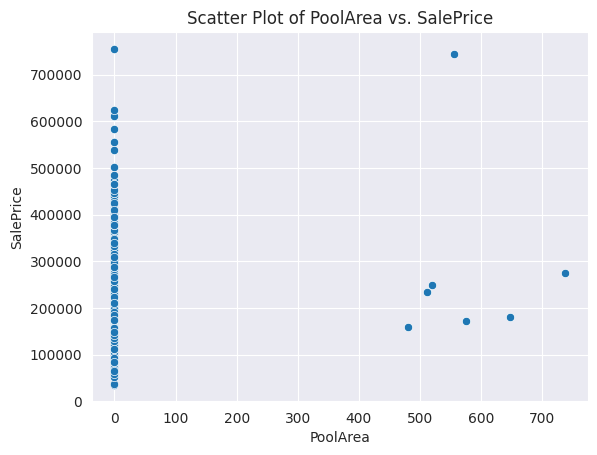

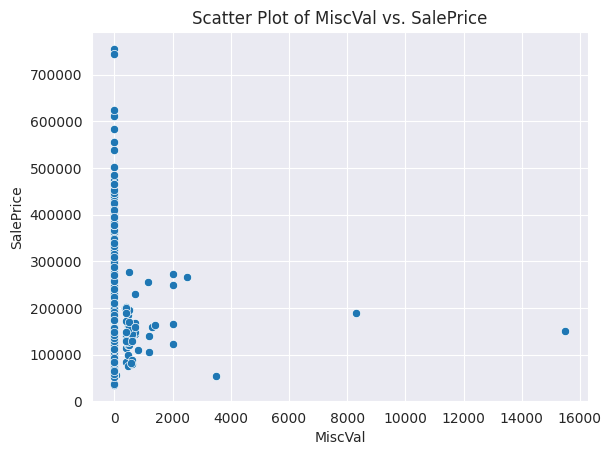

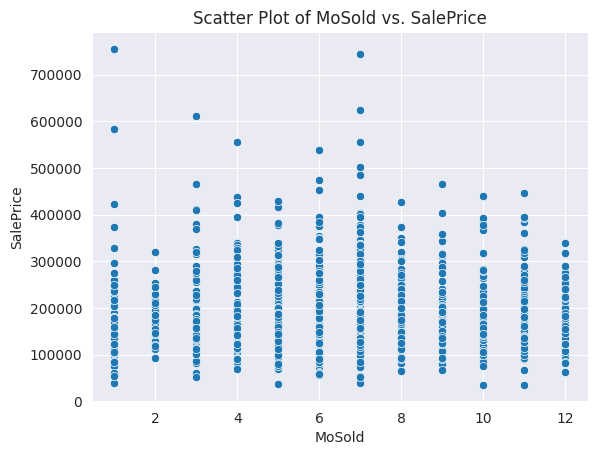

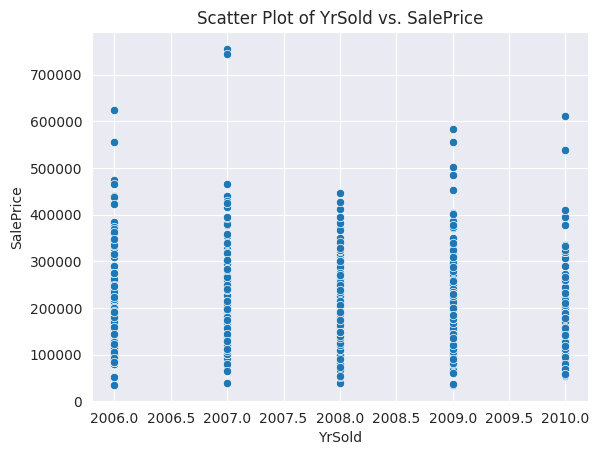

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numCols:
    sns.scatterplot(data=train_data, x=feature, y='SalePrice')
    plt.title(f'Scatter Plot of {feature} vs. SalePrice')
    plt.show()


 Identify the numerical features in the dataset that exhibit a strong linear relationship with the target variable 'SalePrice.' Features with high correlations will be considered as potentially influential in predicting 'SalePrice'. The analysis helps focus on the most relevant features

In [9]:
correlations = train_data[numCols].corrwith(train_data['SalePrice'])
high_correlation_features = correlations[abs(correlations) > 0.5].index
print(high_correlation_features)


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')


<a name="2-eda"></a>
## 2. Exploratory Data Analysis

<a name="2.1-saleprice"></a>
### 2.1. Sale Price

This code creates a histogram to visualize the distribution of the "House Price" (target variable) in the dataset. It sets the figure size to 8x6 inches, then uses Seaborn's displot function to create the histogram of the "y" variable (house prices). Finally, it adds a title to the plot, which is "House Price Distribution."

<Figure size 800x600 with 0 Axes>

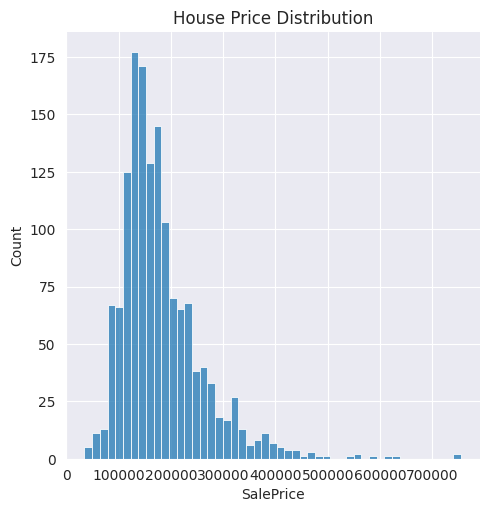

In [10]:
plt.figure(figsize=(8,6))
sns.displot(y)
title = plt.title("House Price Distribution")

The distribution of `SalePrice` is right-skewed. Let's check its Skewness and Kurtosis statistics.

This code calculates and prints the skewness and kurtosis of the "y" variable, which typically represents the distribution characteristics of the target variable (House Prices in this case):

Skewness measures the asymmetry of the data distribution. A positive skewness value indicates a right-skewed (positively skewed) distribution, while a negative skewness value indicates a left-skewed (negatively skewed) distribution. Skewness values near 0 suggest a relatively symmetric distribution.
Kurtosis measures the tail heaviness of the data distribution. Positive kurtosis values indicate heavy tails (leptokurtic), while negative values indicate light tails (platykurtic). A kurtosis value of 3 is typically used as a baseline for a normal distribution. Higher kurtosis values represent more extreme values in the distribution, either in the tails or the peak.

kewness: 1.8828757597682129

This positive skewness value suggests that the distribution of house prices is right-skewed, meaning it has a long right tail with more values concentrated on the lower end of the range.
Kurtosis: 6.536281860064529

The positive kurtosis value indicates that the distribution has heavy tails, which means it has more extreme values in the tails compared to a normal distribution (kurtosis of 3). This suggests that the distribution has more outliers and is more peaked in the center.

In [11]:
print(f"""Skewness: {y.skew()}
Kurtosis: {y.kurt()}""")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


<a name="2.2-numerical"></a>
### 2.2. Numerical Features

Top 10 numerical variables highly correlated with `SalePrice`:

This code computes the correlation between the "SalePrice" and all other features in the "train_data" DataFrame and then sorts these correlations in descending order. It specifically retrieves and displays the top 11 features with the highest positive correlations with "SalePrice," indicating their importance in predicting house prices. These features are likely to have a strong influence on the target variable.

In [12]:
corr_mat = train_data.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

What are the top 10 features selected by [**Recursive Feature Elimination**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)?

This code performs feature selection using Recursive Feature Elimination (RFE) with a Linear Regression estimator. It aims to select the top 10 numerical features that are most relevant for predicting the target variable, "y" (presumably house prices).

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10, step=1)
selector = rfe.fit(X_train.fillna(0).select_dtypes(exclude='object'), y)
selectedFeatures = list(
    X.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['OverallQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

According to above analyses, **Overall Quality, Living Area, Number of Full Baths, Size of Garage and Year Built** are some of the most important features in determining house price. Let's take a closer look at them.

**Overall Quality**

Overall quality is the most important feature in both analyses. It is clear that higher quality makes the house more expensive.

This code creates a box plot to visualize the relationship between the "OverallQual" (Overall Quality) feature and "SalePrice" in the "train_data" DataFrame.

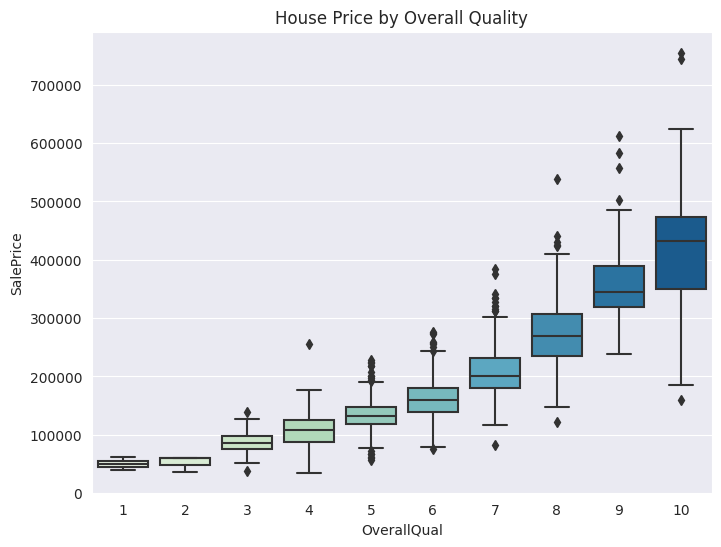

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by Overall Quality')

**Living Area**

Living area has a linear relationship with house price. In the scatter plot below, we can clearly see some ***outliers*** in the data, especially the two houses in the lower-right corner with living area greater than ***4000 sqft*** and price lower than ***$200,000***.

Correlation: 0.7086244776126515


<Figure size 600x600 with 0 Axes>

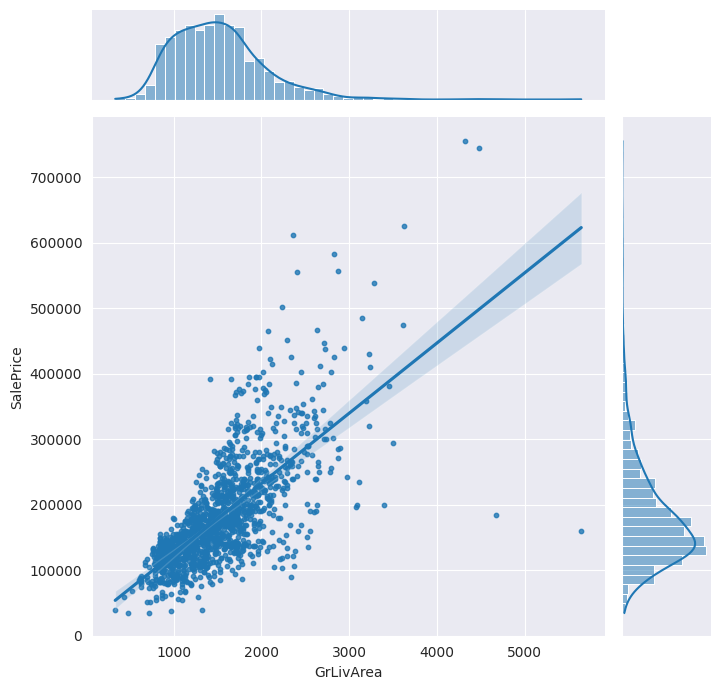

In [15]:
def plotCorrelation(variables):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    correlation = train_data[[variables[0], variables[1]]].corr().iloc[1, 0]
    print("Correlation:", correlation)

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(data=train_data, x=variables[0], y=variables[1], kind='reg', height=7, scatter_kws={'s': 10}, marginal_kws={'kde': True})

# Call the function with the variable names
plotCorrelation(['GrLivArea', 'SalePrice'])


**GarageCars**

Interestingly, houses with garage which can hold 4 cars are cheaper than houses with 3-car garage.

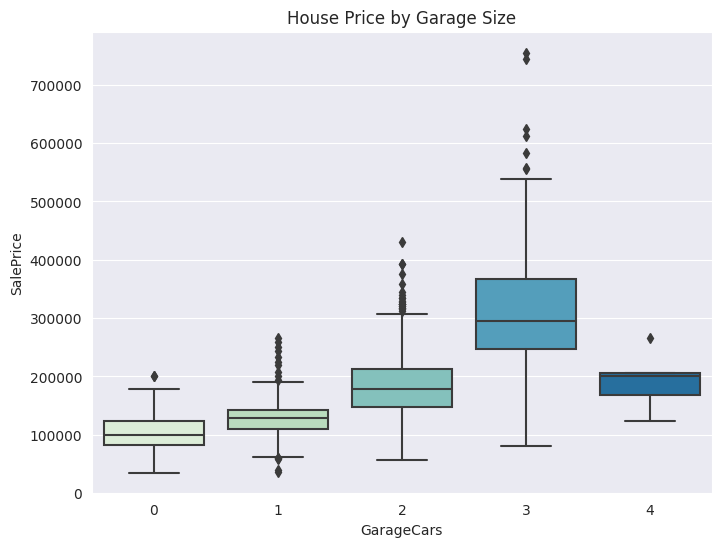

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by Garage Size')

**Year Built**

The age of the house also plays an important role in its price. Newer houses have higher average prices. There are several houses built before 1900 having a high price.

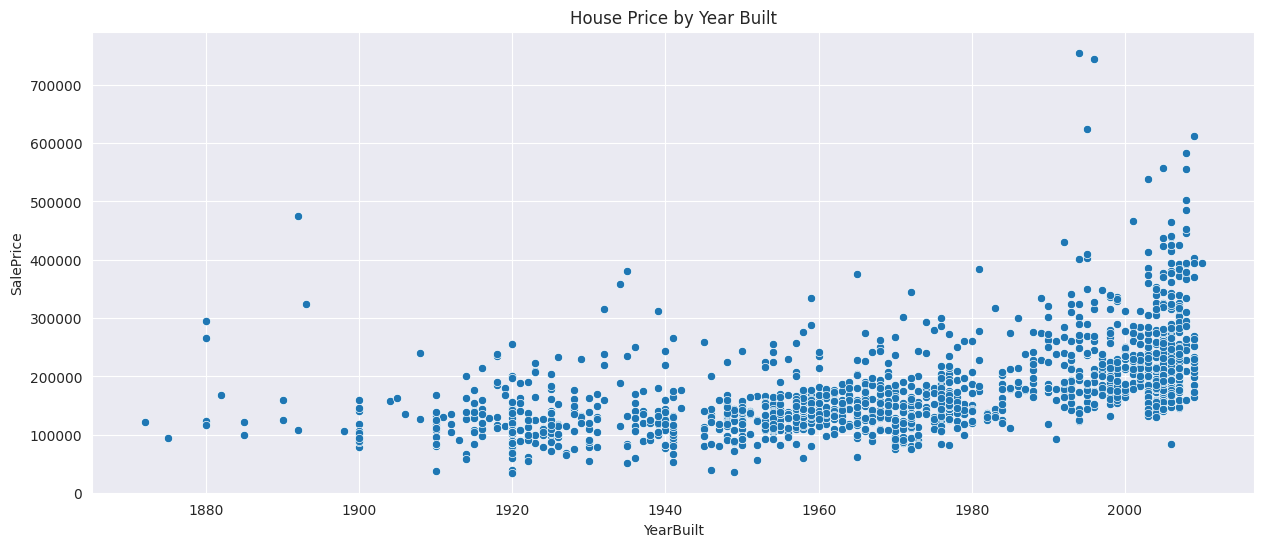

In [17]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
title = plt.title('House Price by Year Built')

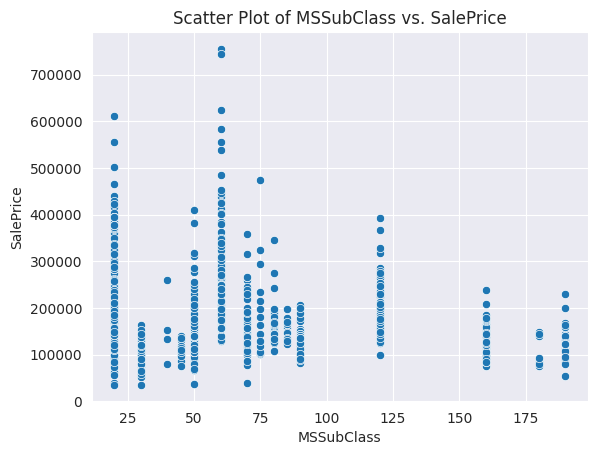

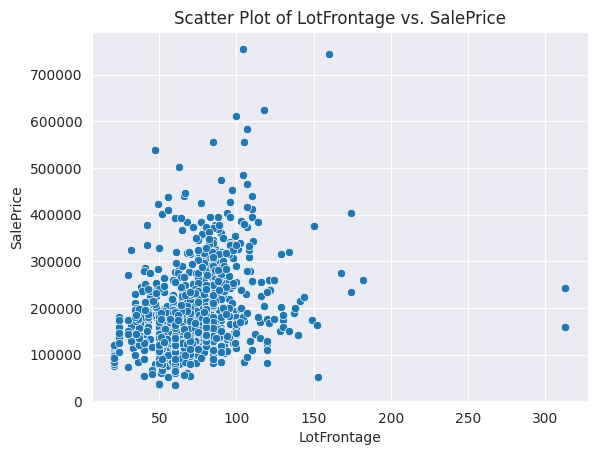

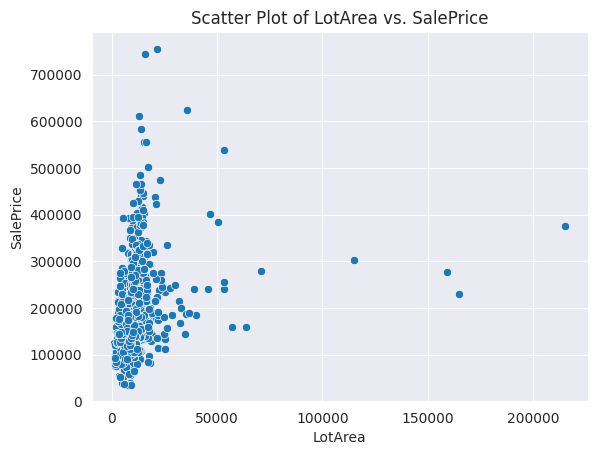

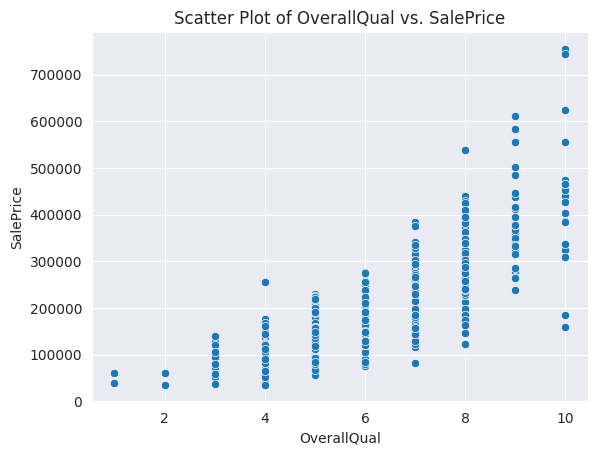

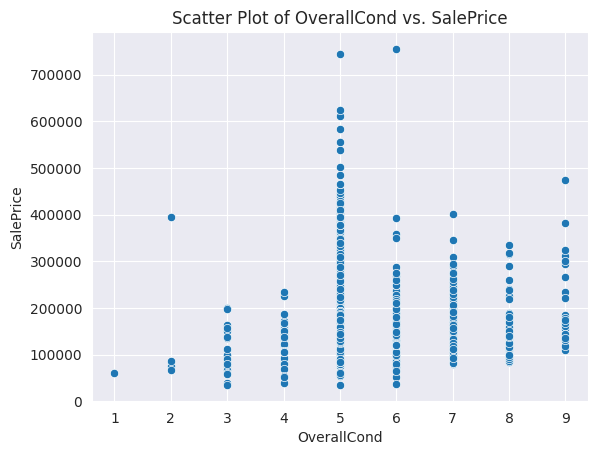

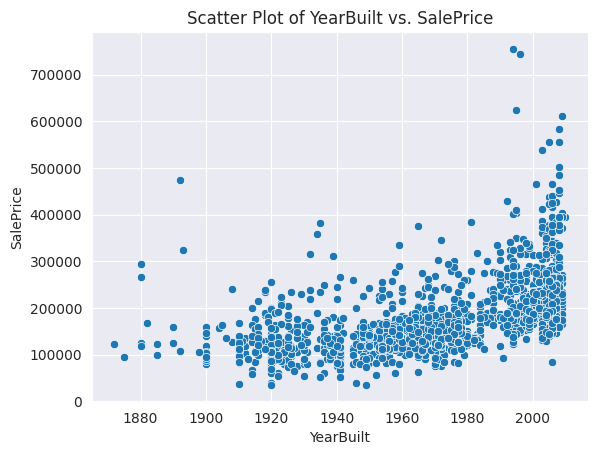

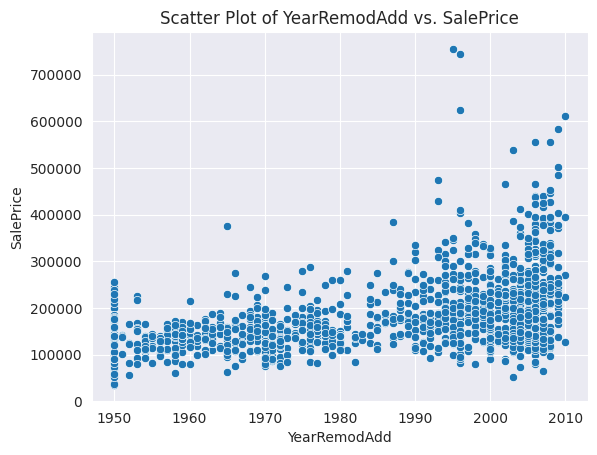

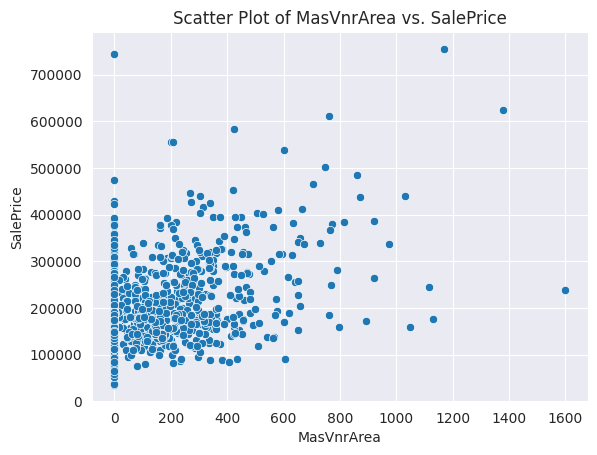

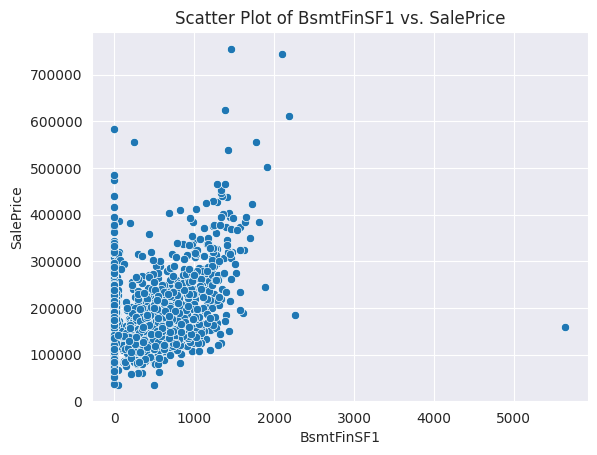

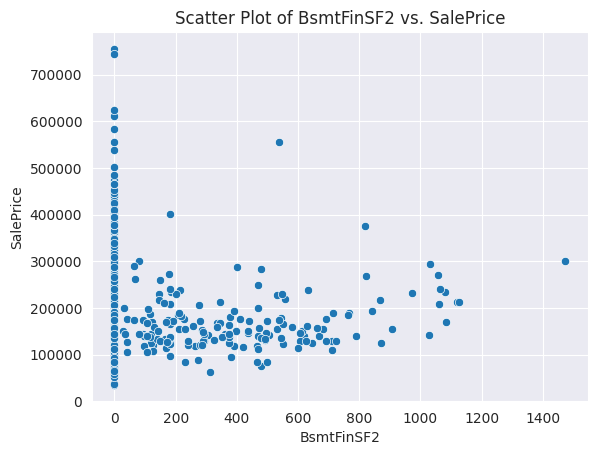

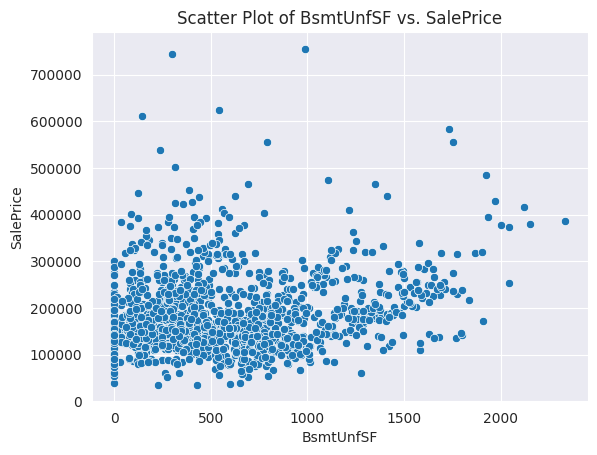

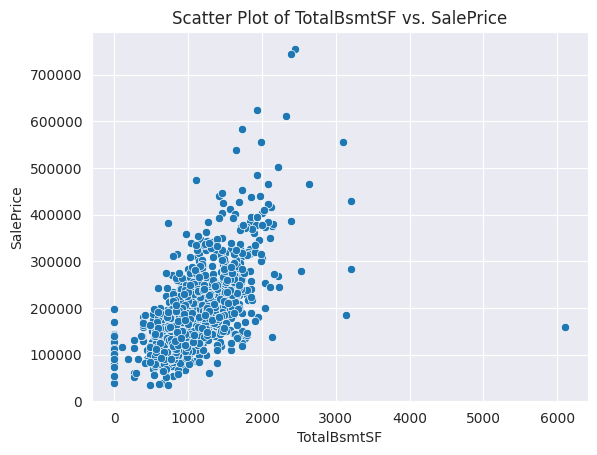

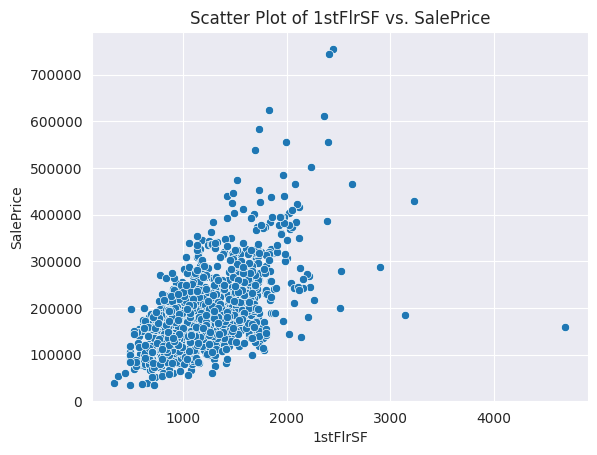

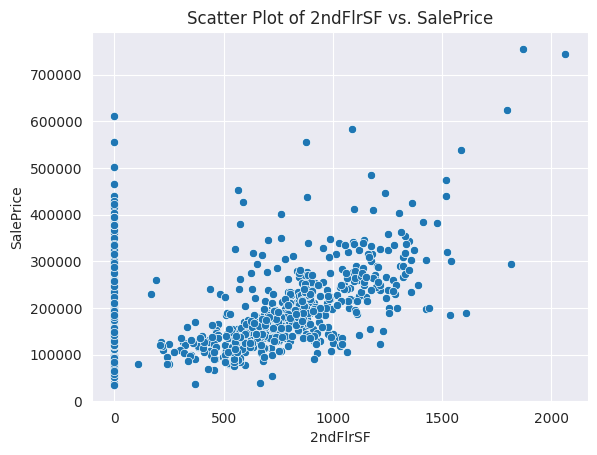

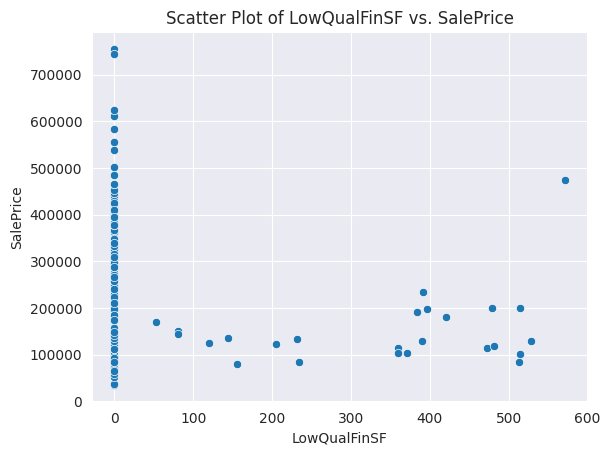

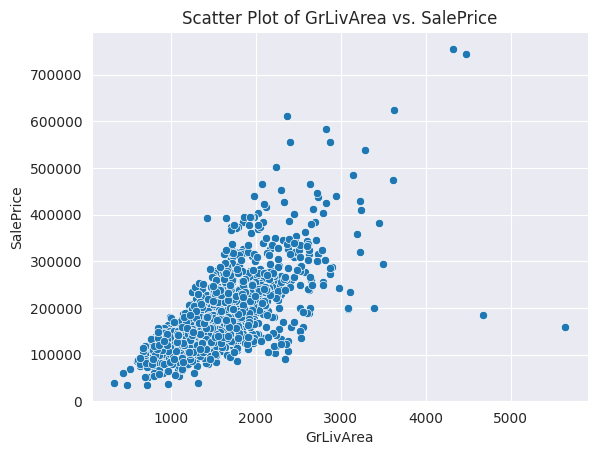

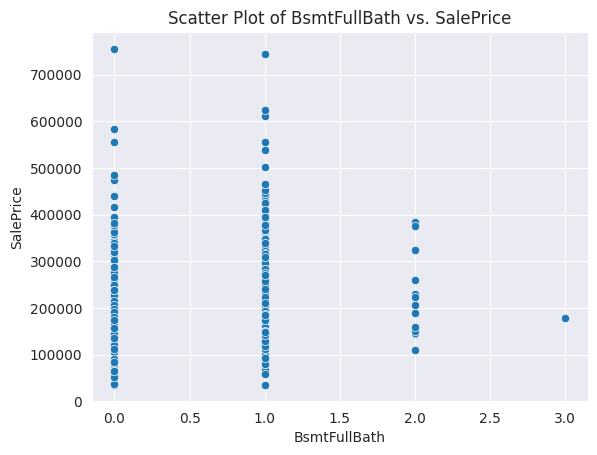

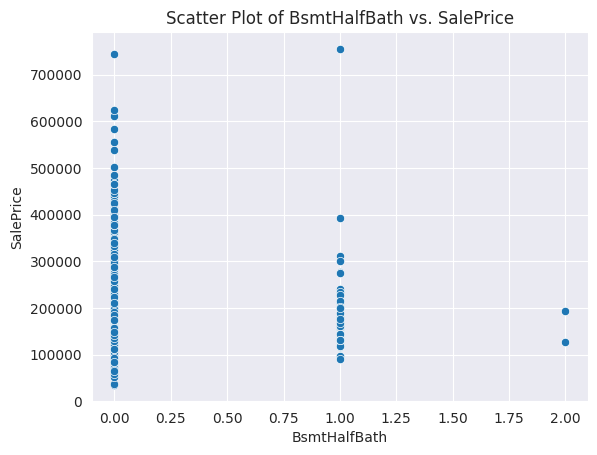

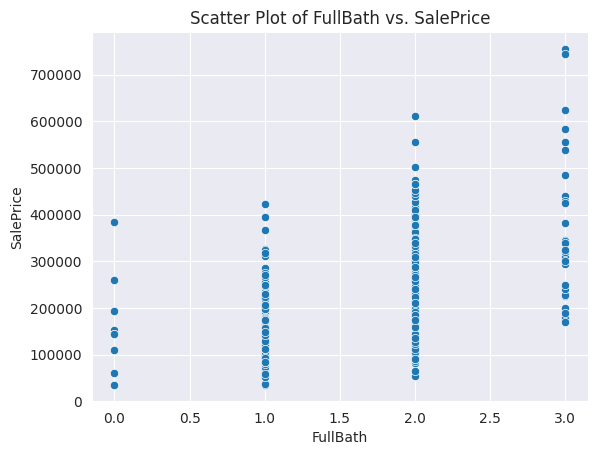

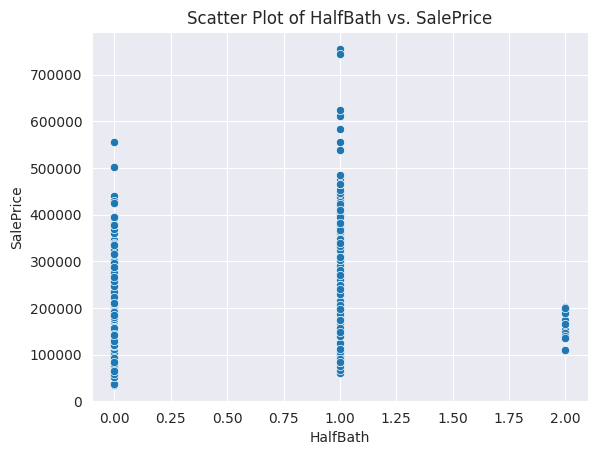

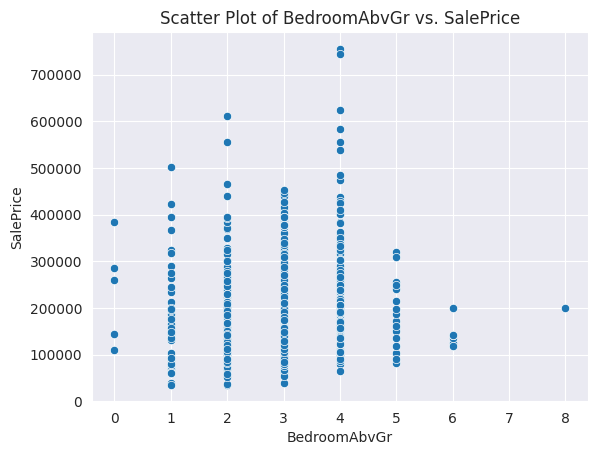

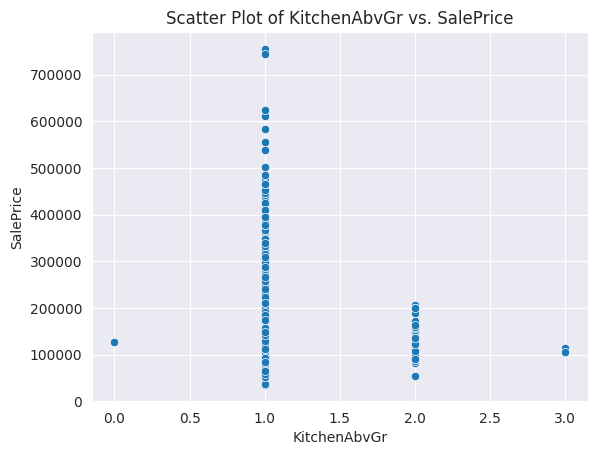

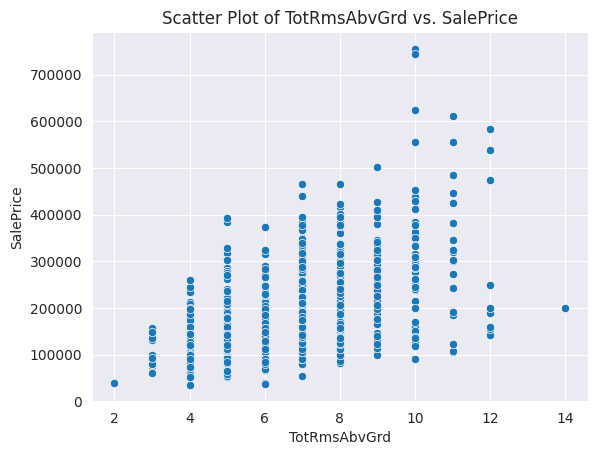

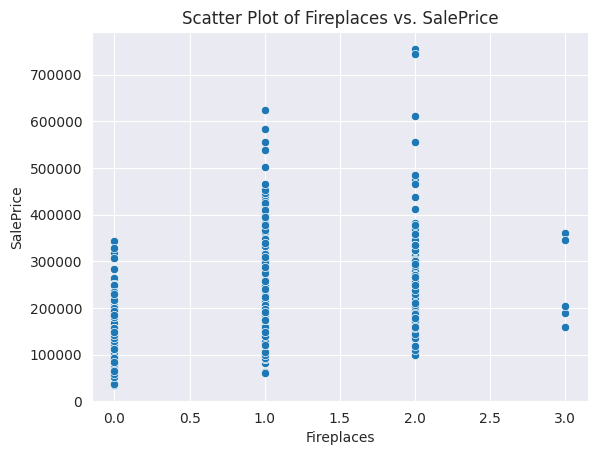

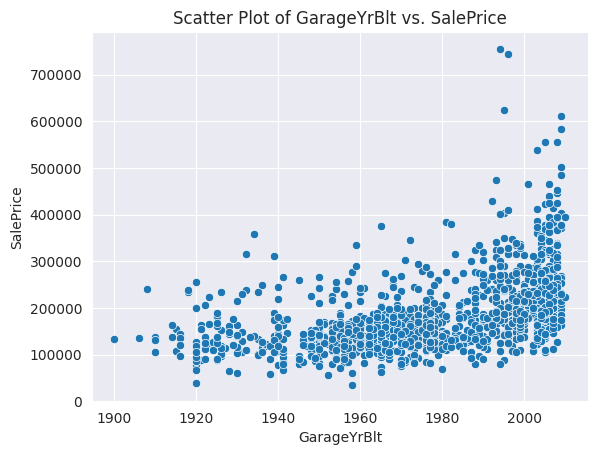

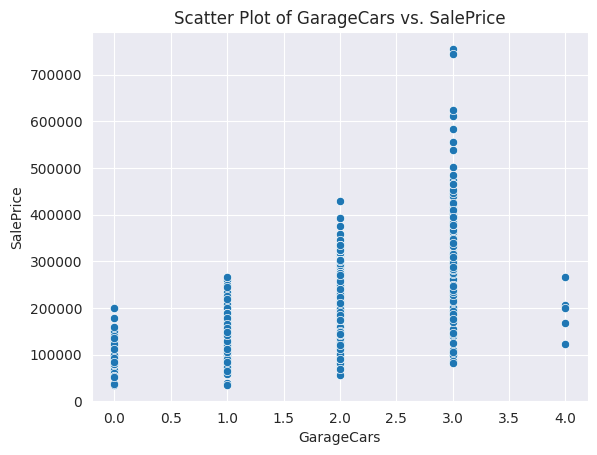

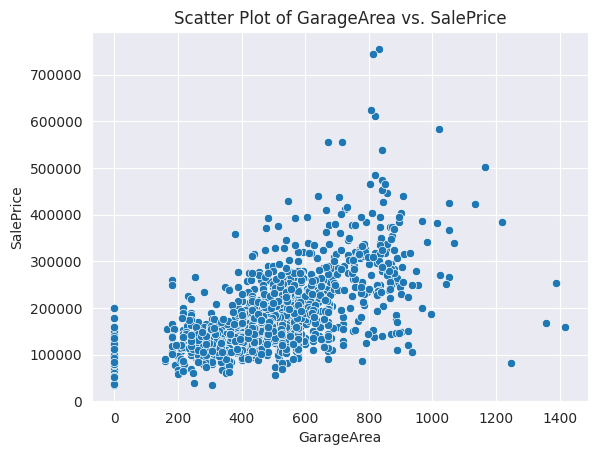

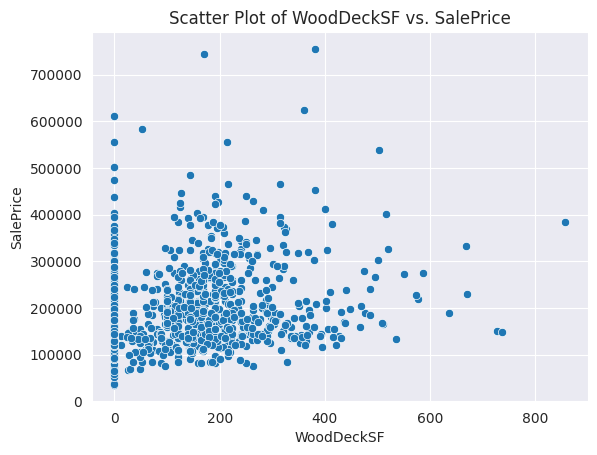

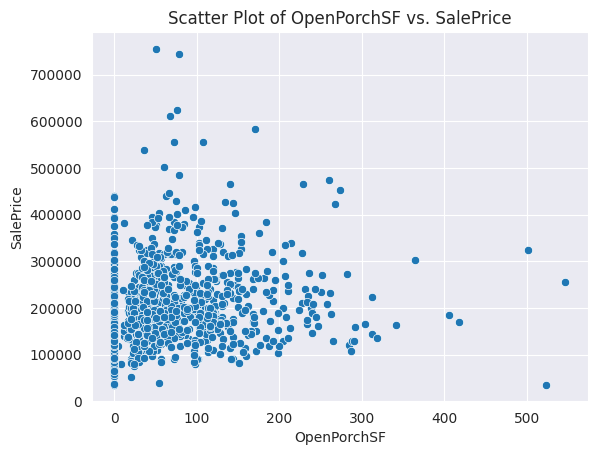

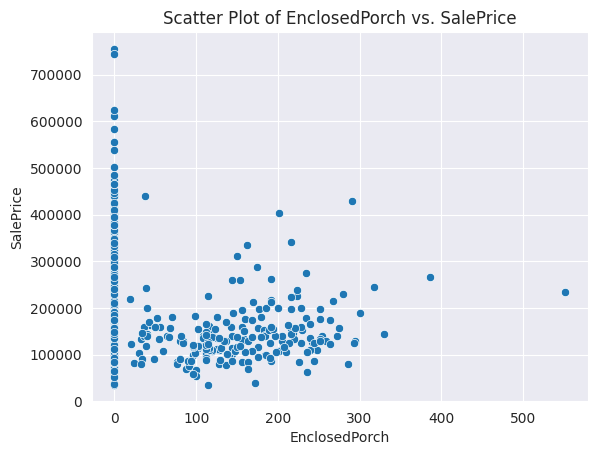

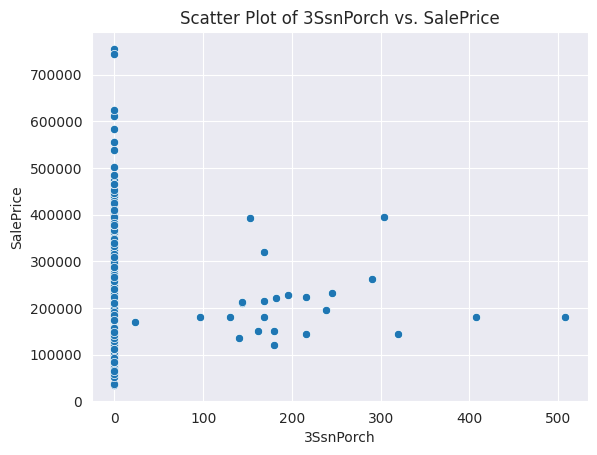

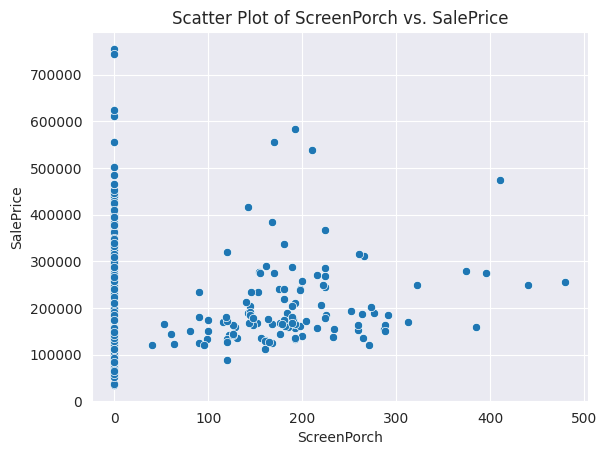

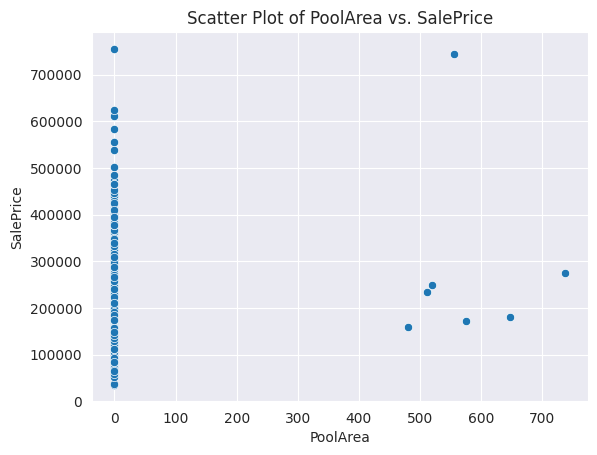

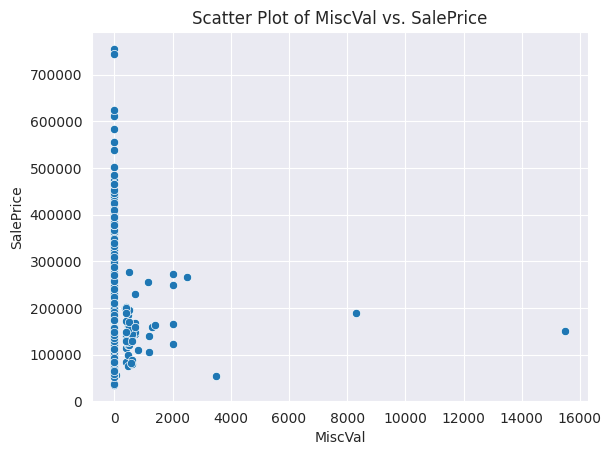

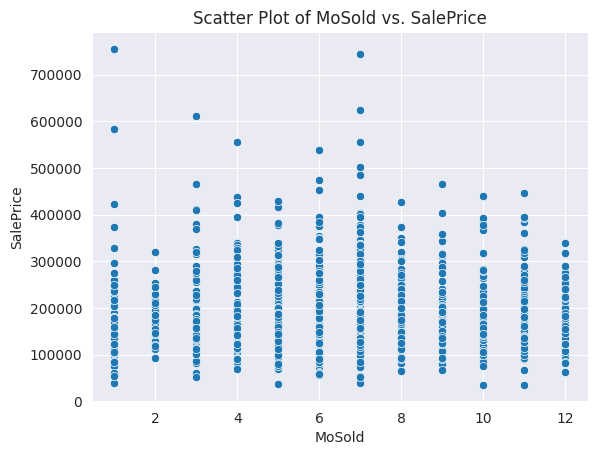

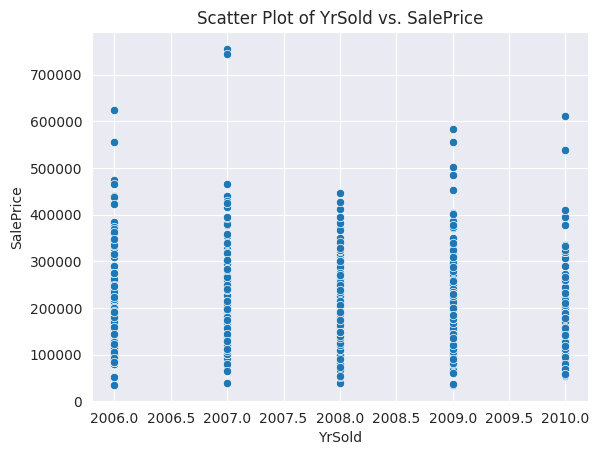

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numCols:
    sns.scatterplot(data=train_data, x=feature, y='SalePrice')
    plt.title(f'Scatter Plot of {feature} vs. SalePrice')
    plt.show()


<a name="2.2-categorical"></a>
### 2.3. Categorical Variables

Using **ANOVA**,15 categorical features having p-values lower than ***0.01*** have been identified:

In [19]:
sigCatCols = [
    'Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'RoofMatl', 'ExterQual', 'BsmtQual',
    'BsmtExposure', 'KitchenQual', 'Functional', 'GarageQual', 'PoolQC'
]

Let's explore some of them.

A function named visualizeCatFeature is used to visualize the relationship between a categorical feature and the SalePrice using box plots.

In [20]:
def visualizeCatFeature(feature):
    """
    Visualize the relationship between `SalePrice` and categorical feature using box plots
    """
    # Descending order of levels sorted by median SalePrice
    featOrder = train_data.groupby(
        [feature]).median().SalePrice.sort_values(ascending=False).index

    # Create box plot
    sns.boxplot(x=feature,
                y='SalePrice',
                data=train_data,
                order=featOrder,
                palette='GnBu_r')

**Neighborhood**

There is a big difference in house prices among neighborhood in Ames. The top 3 expensive neighborhoods are **NridgHt, NoRidge and StoneBr** with median house prices of approximately $300,000, three times as high as the median of the 3 cheapest neighborhoods, which are **BrDale, DOTRR and MeadowV**.

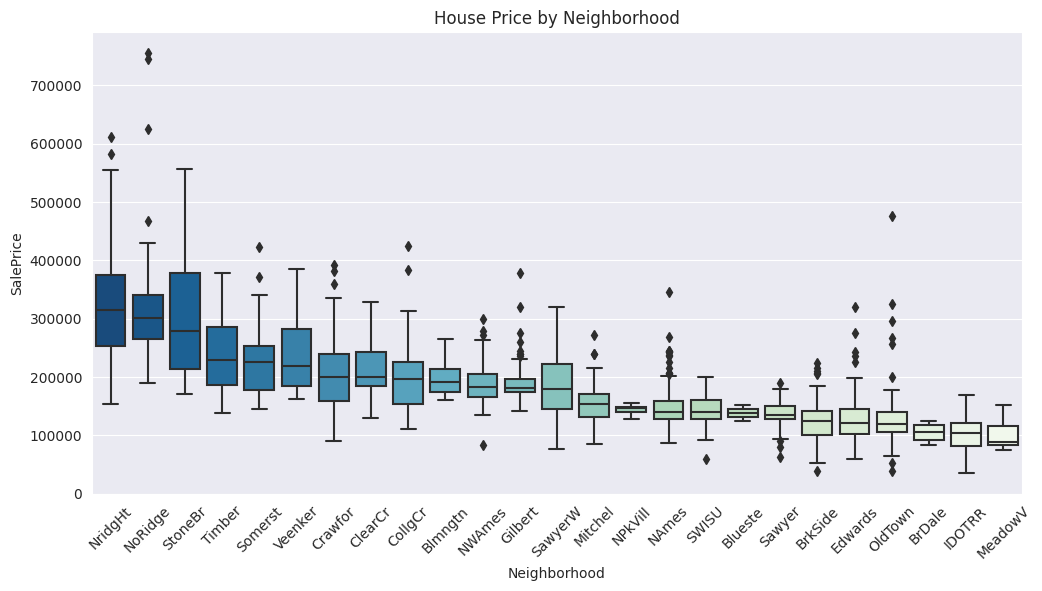

In [21]:
plt.figure(figsize=(12, 6))
visualizeCatFeature('Neighborhood')
title = plt.title('House Price by Neighborhood')
tick = plt.xticks(rotation=45)

**Roof Material**

Houses using **Wood Shingles roof** are the most expensive with price ranging from \\$300,000 to \\$450,000. There are also a lot of expensive houses using **Standard Composite Shingle roof**.

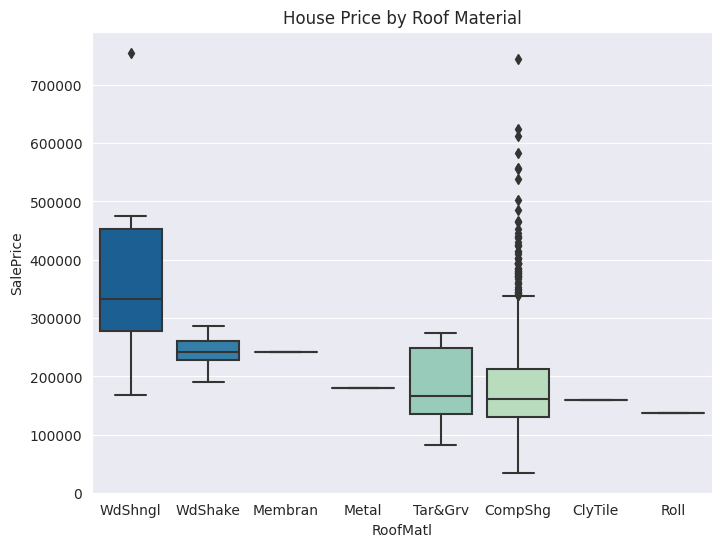

In [22]:
plt.figure(figsize=(8, 6))
visualizeCatFeature('RoofMatl')
title = plt.title('House Price by Roof Material')

**Kitchen Quality**

Kitchen Quality is another important feature to predict house price. There is a very big difference in price between houses with different kitchen quality. For example, the average price difference between a house with a **good** kitchen and one with an **excellent** kitchen is about $120,000.

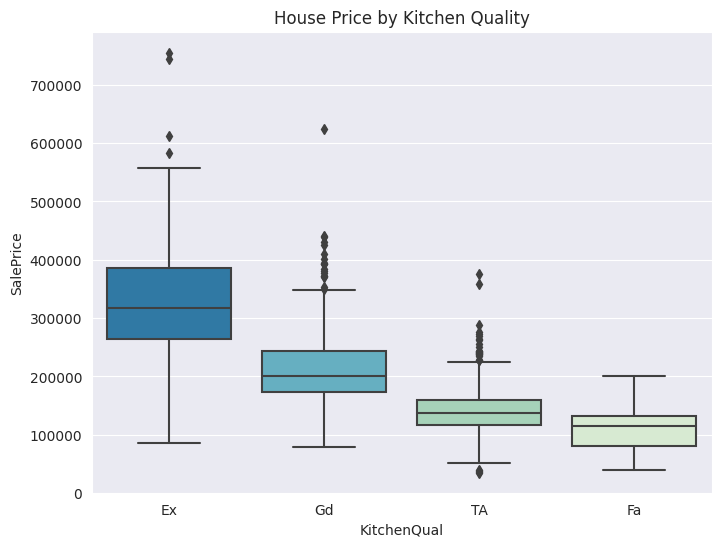

In [23]:
plt.figure(figsize=(8, 6))
visualizeCatFeature('KitchenQual')
title = plt.title('House Price by Kitchen Quality')

<a name="2.4-correlations"></a>
### 2.4. Correlations

Creating a correlation heatmap to visualize the pairwise correlations between numerical features in the training data, excluding the SalePrice column

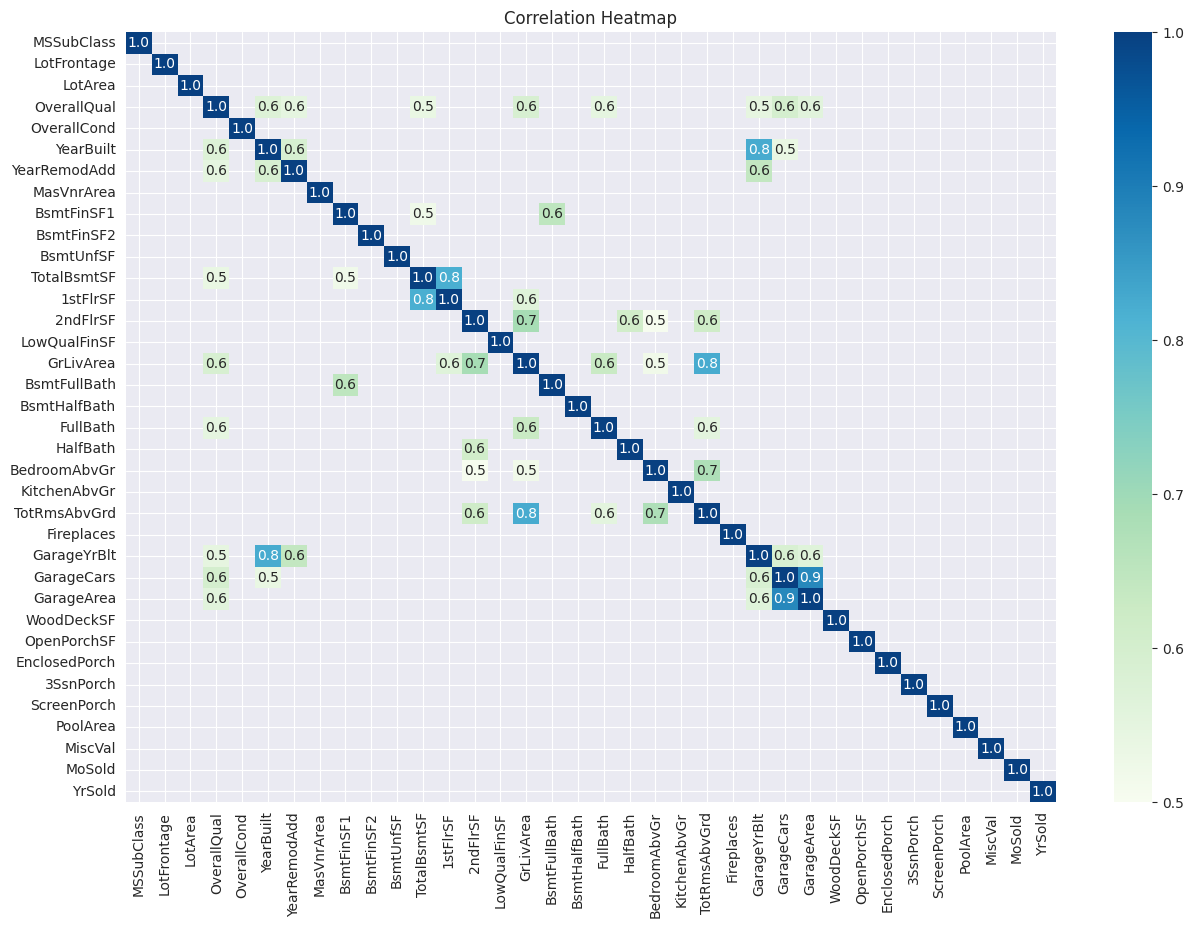

In [24]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = train_data.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

There is multicollinearity in our training data. Below features are highly correlated:
    - GarageCars and GarageArea
    - GarageYrBlt and YearBuilt
    - 1stFlrSF and TotalBsmtSF
    - GrLivArea and TotRmsAbvGrd
Multicolliniearity has a negative impact on our prediction models and makes standard errors of our estimates increase. Therefore, for each pair of highly correlated features, I will remove a feature that has a lower correlation with `SalePrice`.

<a name="2.5-missing"></a>
### 2.5. Missing Values

Most machine learning algorithms give an error when we train them on data with missing values. Therefore, it's important to identify them before deciding how to handle them (drop features or impute missing value).

In [25]:
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum() / len(X) * 100

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(10)

There are 34 features having missing data.

Top 10 missing value features:


Count    Percent
PoolQC         2909  99.657417
MiscFeature    2814  96.402878
Alley          2721  93.216855
Fence          2348  80.438506
FireplaceQu    1420  48.646797
LotFrontage     486  16.649538
GarageFinish    159   5.447071
GarageQual      159   5.447071
GarageCond      159   5.447071
GarageYrBlt     159   5.447071

 Creating a bar plot to visualize the count of missing values for the top 18 features with the most missing data

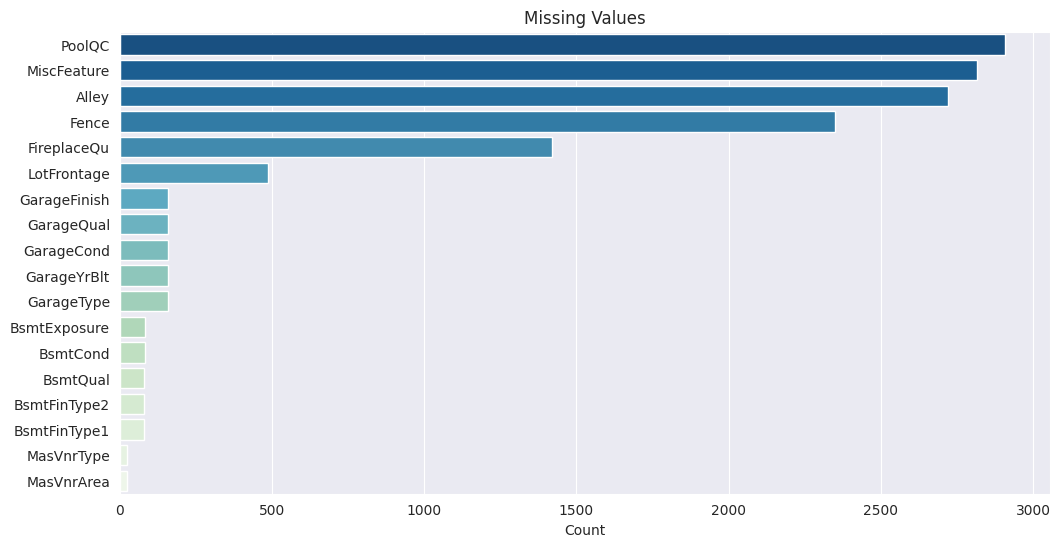

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data.head(18).index,
            x=missing_data.head(18).Count,
            palette='GnBu_r')
title = plt.title("Missing Values")

With some basic understandings of the data set and features, let's move to data preprocessing and modeling steps.

<a name="3-data-preprocessing"></a>
## 3. Data Preprocessing and Feature Engineering

<a name="3.1-missing-values"></a>
### 3.1. Missing Values

In [27]:
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum() / len(X) * 100
missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

In [28]:
missing_data.head(10)

Count    Percent
PoolQC         2909  99.657417
MiscFeature    2814  96.402878
Alley          2721  93.216855
Fence          2348  80.438506
FireplaceQu    1420  48.646797
LotFrontage     486  16.649538
GarageFinish    159   5.447071
GarageQual      159   5.447071
GarageCond      159   5.447071
GarageYrBlt     159   5.447071

There are 34 features that have missing values. We will divide them into three groups based on the data description:
   - **Group 1 - Categorical variables where `NA` means no feature:** `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `MasVnrType` (15 variables)
   
    For this group we will impute `NA` with `'None'`.
    
   - **Group 2 - Numerical variables where `NA` means no feature:** `GarageArea`, `GarageCars`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `BsmtFullBath`, `BsmtHalfBath`, `MasVnrArea` (10 variables)
   
    For this group I will impute `NA` with `0`.
    
   - **Group 3 - Other variables:** `Functional`, `MSZoning`, `Electrical`, `KitchenQual`, `Exterior1st`, `Exterior2nd`, `SaleType`, `Utilities`, `LotFrontage`, `GarageYrBlt` (9 variables)
        -  impute `Functional`, `MSZoning`, `Electrical`, `KitchenQual`, `Exterior1st`, `Exterior2nd`, `SaleType`, `Utilities` with their *modes*,
        - impute `LotFrontage` with its *mean*,
        - impute `GarageYrBlt` with `YearBuilt`.

In [29]:
from sklearn.impute import SimpleImputer
# Group 1:
group_1 = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
X[group_1] = X[group_1].fillna("None")

# Group 2:
group_2 = [
    'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
]

X[group_2] = X[group_2].fillna(0)

# Group 3:
group_3a = [
    'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
    'Exterior2nd', 'SaleType', 'Utilities'
]

imputer = SimpleImputer(strategy='most_frequent')
X[group_3a] = pd.DataFrame(imputer.fit_transform(X[group_3a]), index=X.index)

X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
X.GarageYrBlt = X.GarageYrBlt.fillna(X.YearBuilt)

Let's check whether there is any missing value left:

In [30]:
sum(X.isnull().sum())

0

All missing values have been handled.

<a name="3.2-outliers"></a>
### 3.2. Outliers

Because regression models are very sensitive to outlier, we need to be aware of them. Let's examine outliers with a scatter plot.

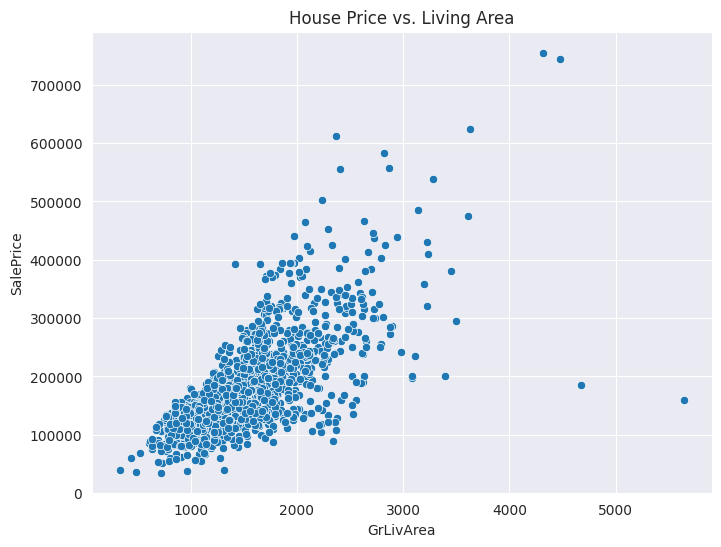

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
title = plt.title('House Price vs. Living Area')

There are two observations lying separately from the rest. They have large living area but low price. They are the outliers that we are looking for. I will delete them from the training set.

In [32]:
outlier_index = train_data[(train_data.GrLivArea > 4000)
                           & (train_data.SalePrice < 200000)].index
X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

<a name="3.3-feature-engineering"></a>
### 3.3. Feature Engineering

<a name="3.3.1-create-new-variables"></a>
#### 3.3.1. Create New Variables

In this step we  will create new features from weaker features in the training data. For example, the surface area of each floor has low correlation with house price; however, when we sum them up, the relationship becomes much stronger. In fact, `TotalSqFeet` becomes the strongest feature in the dataset. The new features I will create are **total square feet, total number of bathrooms, age of the house, whether the house was remodeled, and whether the house was sold in the same year it was built.**

In [33]:
X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['totalBathroom'] = X.FullBath + X.BsmtFullBath + 0.5 * (X.HalfBath + X.BsmtHalfBath)
X['houseAge'] = X.YrSold - X.YearBuilt
X['reModeled'] = np.where(X.YearRemodAdd == X.YearBuilt, 0, 1)
X['isNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0)

<a name="3.3.2-label-encoding"></a>
#### 3.3.2. Label Encoding

Ordinal categorical features are label encoded.

LabelEncoder from the scikit-learn library is used to perform label encoding on specific columns in the dataset. Label encoding is a technique used to convert categorical data into numerical values, which is necessary for many machine learning algorithms.

In [34]:
from sklearn.preprocessing import LabelEncoder

# Ordinal categorical columns
label_encoding_cols = [
    "Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"
]

# Apply Label Encoder
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    X[col] = label_encoder.fit_transform(X[col])

<a name="3.3.3-transform-variables"></a>
#### 3.3.3. Transform Numerical Variables to Categorical Variables

Because we have calculated age of houses, `YearBuilt` is no longer needed. However, `YrSold` could have a large impact on house price (e.g. In economic crisis years, house price could be lower). Therefore, we will transform it into categorical variables.

Like `YrSold`, some numerical variables don't have any ordinal meaning (e.g. `MoSold`, `MSSubClass`). We will transform them into categorical variables.

In [35]:
to_factor_cols = ['YrSold', 'MoSold', 'MSSubClass']

for col in to_factor_cols:
    X[col] = X[col].apply(str)

<a name="3.4-skewness"></a>
### 3.4. Skewness and Normalizing Variables

Normal distribution is one of the assumption that linear regression relies on. Therefore, transfoming skewed data will help our models perform better.

First, let's examine the target variable `SalePrice` with Distribution plot and Quantile-Quantile plot.

**Target variable**

code is to check whether the target variable follows a normal distribution. This is important because many statistical and machine learning models assume that the target variable is normally distributed. Deviations from normality indicate the need for data transformations or alternative modeling approaches. The function normality_plot provides a visual representation of the data's distribution

In [36]:
from scipy import stats
from scipy.stats import norm

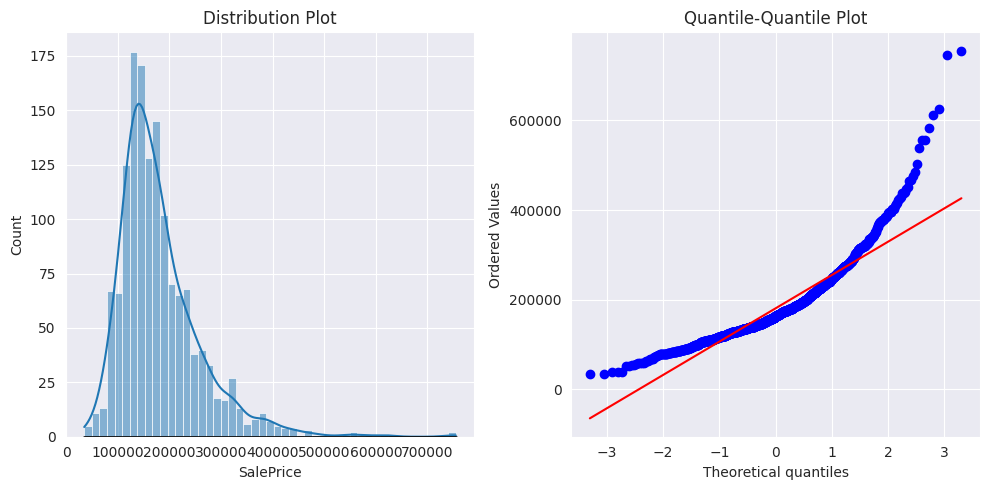

In [37]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

def normality_plot(X):
    """
    1. Draw a distribution plot with a normal distribution fitted curve
    2. Draw a Quantile-Quantile plot
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Create a histogram using histplot (axes-level function)
    sns.histplot(X, kde=True, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    # Fit a normal distribution curve and overlay it on the histogram
    mu, sigma = norm.fit(X)
    xmin, xmax = min(X), max(X)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    axes[0].plot(x, p, 'k', linewidth=2)

    # Create a Quantile-Quantile plot
    probplot(X, plot=axes[1])
    axes[1].set_title('Quantile-Quantile Plot')

    plt.tight_layout()

# Call the function with your data (in this case, 'y' which is assumed to be the data you want to check for normality)
normality_plot(y)


One of the methods to normalize right-skewed data is using log transformation because big values will be pulled to the center. However, log(0) is Nan, so we will use log(1+X) to fix skewness instead.

In [38]:
y = np.log(1 + y)

And this is `SalePrice` after log transformation. The sknewness has been fixed.

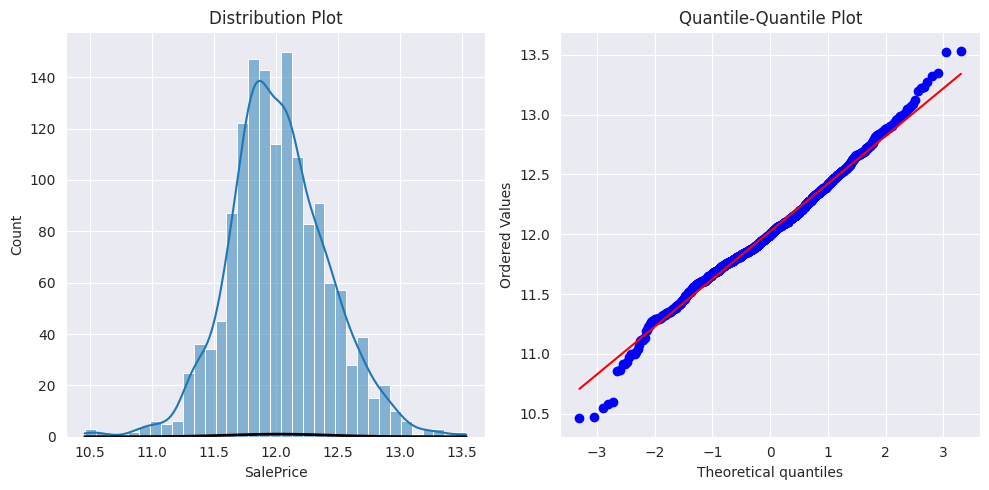

In [39]:
normality_plot(y)

In the next step we will examine skewness in the rest of numerical variables and use log transformation to fix them,

**Fixing skewness in other numerical variables**

If skewness is less than -1 or greater than 1, the distribution is **highly skewed**.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is **moderately skewed**.

If skewness is between -0.5 and 0.5, the distribution is **approximately symmetric**.

Below are skewed features in our original train data.

In [40]:
skewness = train_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64

Let's check normality of `GrLivArea`:

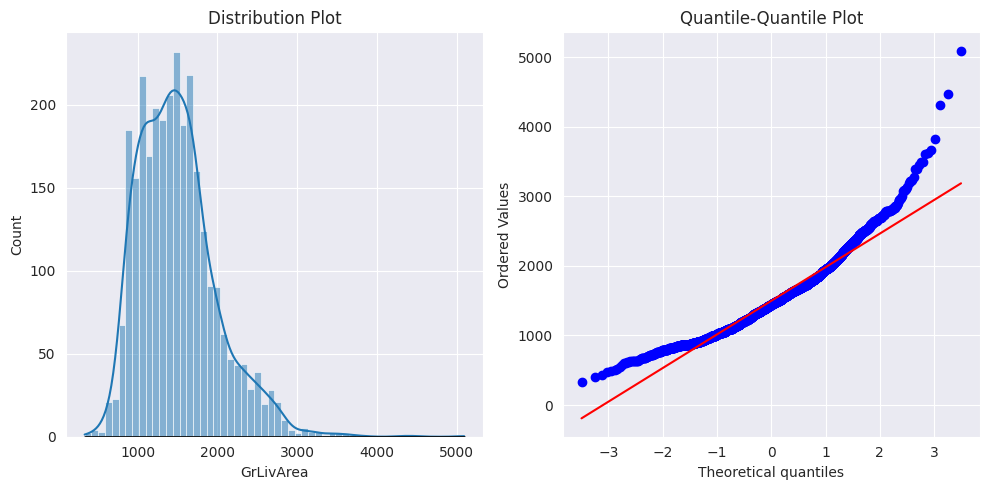

In [41]:
normality_plot(X.GrLivArea)

Performing a log transformation on skewed numerical columns in a dataset, excluding the columns 'MSSubClass' and 'SalePrice

In [42]:
# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 0.5].index)

# Remove 'MSSubClass' and 'SalePrice'
skewed_cols = [
    col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
]

# Log-transform skewed columns
for col in skewed_cols:
    X[col] = np.log(1 + X[col])

Below is normality of `GrLivArea` after log-transformation. Skewness has been fixed.

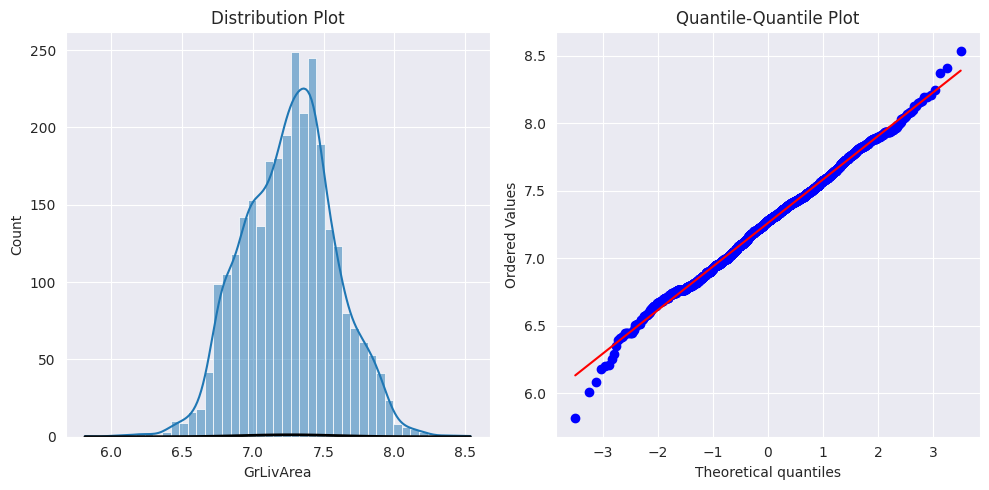

In [43]:
normality_plot(X.GrLivArea)

<a name="3.5-feature-scaling"></a>
### 3.5. Feature Scaling

Except for Decision Tree and Random Forest, it is highly recommended to standardize the data set before running machine learning algorithms since optimization methods and gradient descent run and converge faster on similarly scaled features.

However, outliers can often influence the sample mean and standard deviation in a negative way, and models like Lasso and Elastic Net are very sensitive to outliers. In such cases, the median and the interquartile range often give better results. We will use [**RobustScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) to transform the training data.

 Using the RobustScaler from scikit-learn to scale the numerical columns in the dataset

In [44]:
from sklearn.preprocessing import RobustScaler
numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

<a name="3.6-one-hot-encoding"></a>
### 3.6. One-hot Encoding

Converting categorical features into a numerical format suitable for machine learning by using one-hot encoding. The drop_first=True parameter is used to avoid multicollinearity, and the shape of the DataFrame is printed to show the impact of this encoding on the dataset's dimensionality.

In [45]:
X = pd.get_dummies(X, drop_first=True)
print("X.shape:", X.shape)

X.shape: (2917, 237)


After preprocessing the train and test data, we split them again to perform modeling.

In [46]:
ntest = len(test_data)
X_train = X.iloc[:-ntest, :]
X_test = X.iloc[-ntest:, :]
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (1458, 237)
X_test.shape: (1459, 237)


<a name="4-modeling"></a>
## 4. Modeling

In model evaluation, it's a common practice to split the entire training data into 2 sets of data (train and test). However, a model may work very well on a set of test data but have a poor performance on other sets of unseen data.

A solution to this problem is a procedure called [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) (CV). In the example below, under the basic approach, called k-fold CV, the training set is split into `5` smaller sets. Then, for each fold, a model is trained using the other `4` folds and evaluated on the remaining fold. The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="400" height="200" alt="CV">

We will write a function to get the **Root Mean Squared Logarithmic Error (RMSLE)** for my models using cross-validation. There is one note here: because I have transformed the target variable to *log(1+y)* , the **Mean Squared Error** for *log(1+y)* is the **Mean Squared Logarithmic Error** for `SalePrice`.

In [47]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5


def getRMSLE(model):
    """
    Return the average RMSLE over all folds of training data.
    """
    # Set KFold to shuffle data before the split
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Get RMSLE score
    rmsle = np.sqrt(-cross_val_score(
        model, X_train, y, scoring="neg_mean_squared_error", cv=kf))

    return rmsle.mean()

 Function for calculating the R-squared (coefficient of determination) for a given model using cross-validation.

In [48]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score


n_folds = 5

def getR2(model):
    """
    Return the average R-squared (coefficient of determination) over all folds of training data.
    """
    # Set KFold to shuffle data before the split
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Get R-squared score
    r2 = cross_val_score(model, X_train, y, scoring=make_scorer(r2_score), cv=kf)

    return r2.mean()

Create a function to calculate the Root Mean Squared Error (RMSE)

In [49]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import numpy as np

n_folds = 5

def getRMSE(model):
    """
    Return the average Root Mean Squared Error (RMSE) over all folds of training data.
    """
    # Set KFold to shuffle data before the split
    kf = KFold(n_folds, shuffle=True, random_state=42)

    # Get RMSE score
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring=make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)), cv=kf))

    return rmse.mean()


<a name="4.1-regularized-regression"></a>
### 4.1. Regularized Regressions

In [50]:
from sklearn.linear_model import Ridge, Lasso

<a name="4.1.1-ridge"></a>
#### 4.1.1. Ridge Regression

In the regularized linear regression (Ridge), we try to minimize:

$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$

where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overall cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well.

I will find the $\lambda$ that gives me the smallest **RMSLE** from cross-validation:

Best lambda: 22.9
RMSLE: 0.11409306668450885


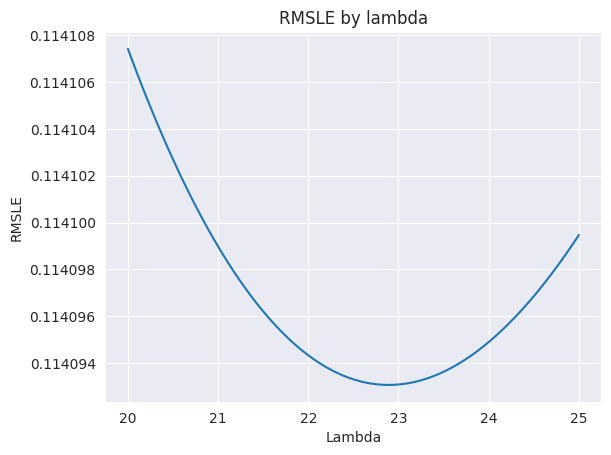

In [51]:
lambda_list = list(np.linspace(20, 25, 101))

rmsle_ridge = [getRMSLE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
rmsle_ridge = pd.Series(rmsle_ridge, index=lambda_list)

rmsle_ridge.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_ridge.idxmin())
print("RMSLE:", rmsle_ridge.min())

In [52]:
ridge = Ridge(alpha=22.9)

The code is performing a hyperparameter search for Ridge regression by varying the regularization parameter (lambda/alpha) over a range of values. It calculates both the Root Mean Squared Logarithmic Error (RMSLE) and the R-squared (R2) for each value of lambda and then visualizes the results.
Results Explanation:

RMSLE: RMSLE measures the accuracy of a regression model, particularly when the target variable has a wide range of values. A lower RMSLE indicates better model performance. The RMSLE of approximately 0.1141 is relatively low, suggesting that the Ridge regression model with lambda around 22.9 provides a good fit to the data.

R2: R-squared (R2) measures how well the model explains the variance in the target variable. An R2 value close to 1 indicates that the model fits the data well. In this case, the Ridge regression model with a lambda value of approximately 22.5 has an R2 of approximately 0.9179, which is a high value and suggests that the model explains a significant portion of the variance in the target variable.

Overall, these results indicate that the Ridge regression model with a lambda value around 22.9 provides a good fit to the data with a low RMSLE and a high R2.

Best lambda for RMSLE: 22.9
RMSLE: 0.11409306668450885
Best lambda for R2: 22.5
R2: 0.9179115393975786


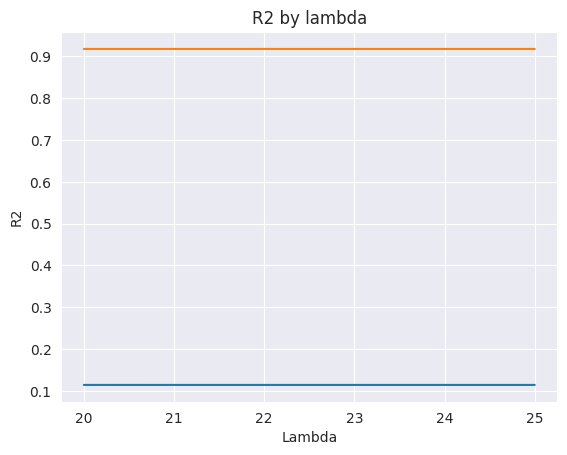

In [53]:

from sklearn.linear_model import Ridge

lambda_list = list(np.linspace(20, 25, 101))

rmsle_ridge = [getRMSLE(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
rmsle_ridge = pd.Series(rmsle_ridge, index=lambda_list)

rmsle_ridge.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda for RMSLE:", rmsle_ridge.idxmin())
print("RMSLE:", rmsle_ridge.min())

# Calculate R-squared for Ridge regression
r2_ridge = [getR2(Ridge(alpha=lambda_)) for lambda_ in lambda_list]
r2_ridge = pd.Series(r2_ridge, index=lambda_list)

r2_ridge.plot(title="R2 by lambda")
plt.xlabel("Lambda")
plt.ylabel("R2")

print("Best lambda for R2:", r2_ridge.idxmax())
print("R2:", r2_ridge.max())

<a name="4.1.2-lasso"></a>
#### 4.1.2. Lasso Regression

Lasso Regression is very similar to Ridge regression. One difference is that in the regularization term, instead of using **sum of squared of $\theta$**, we use **sum of absolute value of $\theta$**:

$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n |\theta_j| \right)$$

Another big difference is that Ridge Regresion can only shrink parameters close to zero while Lasso Regression can shrink some parameters all the way to 0. Therefore, we can use Lasso Regression to perform feature selection and regression.

With the same method above, the best `lambda_` for my Lasso model is **0.00065**.

Best lambda: 0.00065
RMSLE: 0.1133570157806129


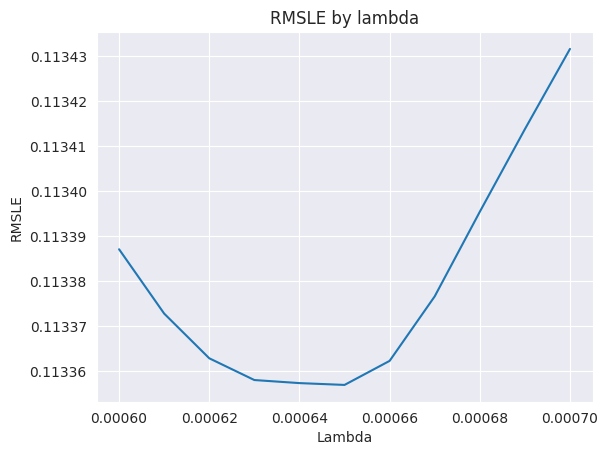

In [54]:
lambda_list = list(np.linspace(0.0006, 0.0007, 11))
rmsle_lasso = [
    getRMSLE(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list
]
rmsle_lasso = pd.Series(rmsle_lasso, index=lambda_list)

rmsle_lasso.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda:", rmsle_lasso.idxmin())
print("RMSLE:", rmsle_lasso.min())

In [55]:
lasso = Lasso(alpha=0.00065, max_iter=100000)

Best lambda for RMSLE: 0.00065
RMSLE: 0.1133570157806129
Best lambda for R2: 0.0006299999999999999
R2: 0.9189356178075195


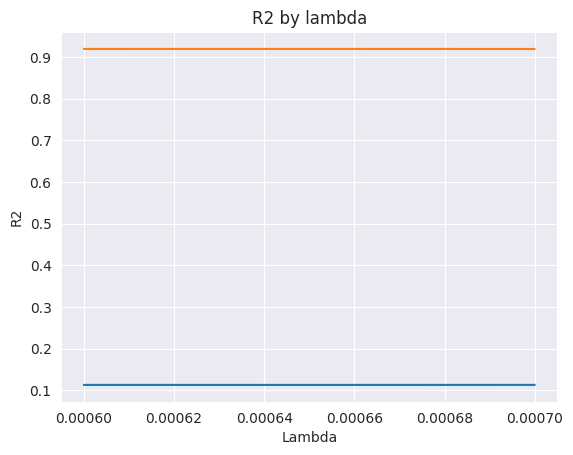

In [56]:
from sklearn.linear_model import Lasso

lambda_list = list(np.linspace(0.0006, 0.0007, 11))

rmsle_lasso = [getRMSLE(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list]
rmsle_lasso = pd.Series(rmsle_lasso, index=lambda_list)

rmsle_lasso.plot(title="RMSLE by lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSLE")

print("Best lambda for RMSLE:", rmsle_lasso.idxmin())
print("RMSLE:", rmsle_lasso.min())

# Calculate R-squared for Lasso regression
r2_lasso = [getR2(Lasso(alpha=lambda_, max_iter=100000)) for lambda_ in lambda_list]
r2_lasso = pd.Series(r2_lasso, index=lambda_list)

r2_lasso.plot(title="R2 by lambda")
plt.xlabel("Lambda")
plt.ylabel("R2")

print("Best lambda for R2:", r2_lasso.idxmax())
print("R2:", r2_lasso.max())


:<a name="4.2-xgboost"></a>
### 4.2 XBOOST
Following this [complete guide](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/?fbclid=IwAR1NTAXqgYzjOOFw3qOV5DrcItwNoM73iPvWggnuyVR1PbvORiEUjRunipo) of parameter tuning for XGBoost, I respectively tune and find the best parameter for  `n_estimators` `max_depth` `min_child_weight` `gamma` `subsample` `colsample_bytree` `reg_alpha` `reg_lambda` `learning_rate`.

In [57]:
from xgboost import XGBRegressor

In [58]:
xgb = XGBRegressor(learning_rate=0.05,
                   n_estimators=2100,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   verbosity=0,  # Use 'verbosity' instead of 'silent'
                   random_state=7,
                   n_jobs=2)

getRMSLE(xgb)


0.11704386812326902

In [59]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.05,
                   n_estimators=2100,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   verbosity=0,  # Use 'verbosity' instead of 'silent'
                   random_state=7,
                   n_jobs=2)

# Calculate RMSLE
rmsle_xgb = getRMSLE(xgb)
print("RMSLE for XGBoost:", rmsle_xgb)

# Calculate R-squared (R2)
r2_xgb = getR2(xgb)
print("R-squared for XGBoost:", r2_xgb)


RMSLE for XGBoost: 0.11704386812326902
R-squared for XGBoost: 0.9139411405298642


**4.3 RANDOM FOREST MODEL**

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Calculate R-squared (R2) for Random Forest
r2_rf = getR2(rf_model)
print("R-squared for Random Forest:", r2_rf)


R-squared for Random Forest: 0.8807685245713281


**4.4 DECISION TREE MODEL**

In [61]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model
dt_model = DecisionTreeRegressor()


# Calculate R-squared (R2) for Decision Tree
r2_dt = getR2(dt_model)
print("R-squared for Decision Tree:", r2_dt)


R-squared for Decision Tree: 0.7400981376781768


**bold text**<a name="4.4-averaging-model"></a>
### 4.5. Averaging Model

Regularized regression and gradient boosting work very differently and they may perform well on different data points. Thus it is a good practice to get average predictions from these models. Below I create a new class for my averaging model.

In [62]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone


class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Create clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        # Get predictions from trained clone models
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])

        # Return average predictions
        return np.mean(predictions, axis=1)

In [63]:
from sklearn.linear_model import Lasso

# Define and configure the Lasso model
lasso = Lasso(alpha=0.1)  # You can specify the alpha (regularization strength) as needed

# Now you can create the AveragingModel with all the models
avg_RMSLEmodel = AveragingModel(models=(ridge, lasso, xgb))


Average of 3 for RMSLE

In [64]:
avg_RMSLEmodel = AveragingModel(models=(ridge, lasso, xgb))
getRMSLE(avg_RMSLEmodel)

0.13021364729690235

AVERAGE R2 FOR ALL MODELS

In [65]:
avg_r2model=AveragingModel(models=(lasso, ridge, xgb, rf_model, dt_model))
getR2(avg_r2model)

0.8923565430929712

In [67]:
my_model = avg_RMSLEmodel
my_model.fit(X_train, y)
predictions = my_model.predict(X_test)
final_predictions = np.exp(predictions) - 1
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)